In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
removal_list_temp = []

In [3]:
def convert_lists(dataframe):
    for i in range(len(dataframe)):
        for col in dataframe.columns:
            col_int = ['tweet_count', 'trump_count', 'clinton_count']
            col_float = ['sentiment_scores', 'trump_sent', 'clinton_sent', 'positive_sent', 'negative_sent']

            if col in col_int:
                temp_list = dataframe[col][i]
                if temp_list == "[]":
                    temp_list = []
                else:
                    temp_list = temp_list.split(',')
                    temp_list[-1] = temp_list[-1][:-1]
                    for x in range(len(temp_list)):
                        temp_list[x] = temp_list[x][1:]
                        temp_list[x] = int(temp_list[x])
                dataframe[col][i] = temp_list

            if col in col_float:
                temp_list = dataframe[col][i]
                if temp_list == "[]":
                    temp_list = []
                else:
                    temp_list = temp_list.split(',')
                    temp_list[-1] = temp_list[-1][:-1]
                    for x in range(len(temp_list)):
                        temp_list[x] = temp_list[x][1:]
                        temp_list[x] = float(temp_list[x])
                dataframe[col][i] = temp_list
    return dataframe

**Read in user dataframe**

In [4]:
# NR_DF = pd.read_pickle('BefAft_V3_DidRespond/befAft_1D_05_07_2020.pkl')
NR_DF = pd.read_csv('BefAft_V3_DidRespond/data_noninf_responsive_05_25_20_6month.csv')
NR_DF = NR_DF.drop(columns=['Unnamed: 0'])
NR_DF = convert_lists(NR_DF)

In [5]:
# NR_DF.head()

In [6]:
# NN_DF = pd.read_pickle('BefAft_V3_DidNotRespond/befAft_2D_05_07_2020.pkl')
NN_DF = pd.read_csv('BefAft_V3_DidNotRespond/data_noninf_nonresponsive_05_25_20_6month.csv')
NN_DF = NN_DF.drop(columns=['Unnamed: 0'])
NN_DF = convert_lists(NN_DF)

In [7]:
# NN_DF.head()

In [8]:
# IR_DF = pd.read_pickle("BefAft_Infl_DidRespond/befAft_2D_Inf_05_05_2020.pkl")
IR_DF = pd.read_csv('BefAft_Infl_DidRespond/data_inf_responsive_05_25_20_6month.csv')
IR_DF = IR_DF.drop(columns=['Unnamed: 0'])
IR_DF = convert_lists(IR_DF)

In [9]:
# IN_DF = pd.read_pickle('BefAft_Infl_DidNotRespond/befAft_INF_NONRESPONSIVE_05_08_2020.pkl')

IN_DF = pd.read_csv('BefAft_Infl_DidNotRespond/data_inf_nonresponsive_05_25_20_6month.csv')
IN_DF = IN_DF.drop(columns=['Unnamed: 0'])
IN_DF = convert_lists(IN_DF)

**Read in user first tweet dictionaries**

In [10]:
# NR_first_tweet_dict = pickle.load(open("NR_first.p", "rb" ))
with open('NR_first.csv') as csv_file:
    reader = csv.reader(csv_file)
    NR_first_tweet_dict = dict(reader)
    
# NN_first_tweet_dict = pickle.load(open("NN_first.p", "rb" ))
with open('NN_first.csv') as csv_file:
    reader = csv.reader(csv_file)
    NN_first_tweet_dict = dict(reader)
    
# IR_first_tweet_dict = pickle.load(open("IR_first.p", "rb" ))
with open('IR_first.csv') as csv_file:
    reader = csv.reader(csv_file)
    IR_first_tweet_dict = dict(reader)
    
# IN_first_tweet_dict = pickle.load(open("IN_first.p", "rb" ))
with open('IN_first.csv') as csv_file:
    reader = csv.reader(csv_file)
    IN_first_tweet_dict = dict(reader)

In [11]:
# len(IN_first_tweet_dict)

**DATAFRAMES FOR NON-INFLUENCER, NON-RESPONSIVE USERS**

In [12]:
NN_year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NN_year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NN_year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NN_year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NN_year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NN_year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NN_year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NN_year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NN_year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


**DATAFRAMES FOR NON-INFLUENCER, RESPONSIVE USERS**

In [13]:
NR_year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NR_year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NR_year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NR_year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NR_year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NR_year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NR_year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

NR_year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
NR_year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


**DATAFRAMES FOR INFLUENCER, RESPONSIVE USERS**

In [14]:
IR_year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IR_year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IR_year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IR_year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IR_year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IR_year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IR_year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IR_year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IR_year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


**DATAFRAMES FOR INFLUENCER, NON-RESPONSIVE USERS**

In [15]:
IN_year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IN_year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IN_year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IN_year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IN_year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IN_year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IN_year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

IN_year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
IN_year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

**Functions to simplify data for graphing and to remove users whose accounts were not active three months prior to IRA contact**

In [16]:
def populateDataFrame(beforeAfterDF, year1DF_count, year1DF_sent, year1DF_trump, year1DF_clinton, year1DF_trump_sent, 
                      year1DF_clinton_sent, year2DF_count, year2DF_sent, year2DF_trump, year2DF_clinton, year2DF_trump_sent, 
                      year2DF_clinton_sent, year3DF_count, year3DF_sent, year3DF_trump, year3DF_clinton, year3DF_trump_sent, 
                      year3DF_clinton_sent):

    for i in range(len(beforeAfterDF)):

            username = beforeAfterDF['username'][i]
            tweet_count = beforeAfterDF['tweet_count'][i]
            sentiment_score = beforeAfterDF['sentiment_scores'][i]
            trump_count = beforeAfterDF['trump_count'][i]
            clinton_count = beforeAfterDF['clinton_count'][i]
            trump_sent = beforeAfterDF['trump_sent'][i]
            clinton_sent = beforeAfterDF['clinton_sent'][i]
            positive_sent = beforeAfterDF['positive_sent'][i]
            negative_sent = beforeAfterDF['negative_sent'][i]

            year1_count = tweet_count[0:24]
            year1_sent = sentiment_score[0:24]
            year1_trump = trump_count[0:24]
            year1_clinton = clinton_count[0:24]
            year1_trump_sent = trump_sent[0:24]
            year1_clinton_sent = clinton_sent[0:24]
            year1_positive_sent = positive_sent[0:24]
            year1_negative_sent = negative_sent[0:24]


            year1DF_count = year1DF_count.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year1_count[0],'-11':year1_count[1],'-10':year1_count[2],'-9':year1_count[3],
                                                  '-8':year1_count[4],'-7':year1_count[5], '-6':year1_count[6], '-5':year1_count[7], 
                                                  '-4':year1_count[8], '-3':year1_count[9], '-2':year1_count[10], '-1':year1_count[11], 
                                                  '1':year1_count[12], '2':year1_count[13], '3':year1_count[14], '4':year1_count[15],
                                                  '5':year1_count[16], '6':year1_count[17], '7':year1_count[18], '8':year1_count[19], 
                                                  '9':year1_count[20], '10':year1_count[21], '11':year1_count[22], '12':year1_count[23]}, 
                                                 ignore_index = True) 
            year1DF_sent = year1DF_sent.append({'username': username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year1_sent[0],'-11':year1_sent[1],'-10':year1_sent[2],'-9':year1_sent[3],
                                                  '-8':year1_sent[4],'-7':year1_sent[5], '-6':year1_sent[6], '-5':year1_sent[7], 
                                                  '-4':year1_sent[8], '-3':year1_sent[9], '-2':year1_sent[10], '-1':year1_sent[11], 
                                                  '1':year1_sent[12], '2':year1_sent[13], '3':year1_sent[14], '4':year1_sent[15],
                                                  '5':year1_sent[16], '6':year1_sent[17], '7':year1_sent[18], '8':year1_sent[19], 
                                                  '9':year1_sent[20], '10':year1_sent[21], '11':year1_sent[22], '12':year1_sent[23]}, 
                                                 ignore_index = True) 
            year1DF_trump = year1DF_trump.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year1_trump[0],'-11':year1_trump[1],'-10':year1_trump[2],'-9':year1_trump[3],
                                                  '-8':year1_trump[4],'-7':year1_trump[5], '-6':year1_trump[6], '-5':year1_trump[7], 
                                                  '-4':year1_trump[8], '-3':year1_trump[9], '-2':year1_trump[10], '-1':year1_trump[11], 
                                                  '1':year1_trump[12], '2':year1_trump[13], '3':year1_trump[14], '4':year1_trump[15],
                                                  '5':year1_trump[16], '6':year1_trump[17], '7':year1_trump[18], '8':year1_trump[19], 
                                                  '9':year1_trump[20], '10':year1_trump[21], '11':year1_trump[22], '12':year1_trump[23]}, 
                                                 ignore_index = True) 
            year1DF_clinton = year1DF_clinton.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year1_clinton[0],'-11':year1_clinton[1],'-10':year1_clinton[2],'-9':year1_clinton[3],
                                                  '-8':year1_clinton[4],'-7':year1_clinton[5], '-6':year1_clinton[6], '-5':year1_clinton[7], 
                                                  '-4':year1_clinton[8], '-3':year1_clinton[9], '-2':year1_clinton[10], '-1':year1_clinton[11], 
                                                  '1':year1_clinton[12], '2':year1_clinton[13], '3':year1_clinton[14], '4':year1_clinton[15],
                                                  '5':year1_clinton[16], '6':year1_clinton[17], '7':year1_clinton[18], '8':year1_clinton[19], 
                                                  '9':year1_clinton[20], '10':year1_clinton[21], '11':year1_clinton[22], '12':year1_clinton[23]}, 
                                                 ignore_index = True) 
            year1DF_trump_sent = year1DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year1_trump_sent[0],'-11':year1_trump_sent[1],'-10':year1_trump_sent[2],'-9':year1_trump_sent[3],
                                                  '-8':year1_trump_sent[4],'-7':year1_trump_sent[5], '-6':year1_trump_sent[6], '-5':year1_trump_sent[7], 
                                                  '-4':year1_trump_sent[8], '-3':year1_trump_sent[9], '-2':year1_trump_sent[10], '-1':year1_trump_sent[11], 
                                                  '1':year1_trump_sent[12], '2':year1_trump_sent[13], '3':year1_trump_sent[14], '4':year1_trump_sent[15],
                                                  '5':year1_trump_sent[16], '6':year1_trump_sent[17], '7':year1_trump_sent[18], '8':year1_trump_sent[19], 
                                                  '9':year1_trump_sent[20], '10':year1_trump_sent[21], '11':year1_trump_sent[22], '12':year1_trump_sent[23]}, 
                                                 ignore_index = True)
            year1DF_clinton_sent = year1DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year1_clinton_sent[0],'-11':year1_clinton_sent[1],'-10':year1_clinton_sent[2],'-9':year1_clinton_sent[3],
                                                  '-8':year1_clinton_sent[4],'-7':year1_clinton_sent[5], '-6':year1_clinton_sent[6], '-5':year1_clinton_sent[7], 
                                                  '-4':year1_clinton_sent[8], '-3':year1_clinton_sent[9], '-2':year1_clinton_sent[10], '-1':year1_clinton_sent[11], 
                                                  '1':year1_clinton_sent[12], '2':year1_clinton_sent[13], '3':year1_clinton_sent[14], '4':year1_clinton_sent[15],
                                                  '5':year1_clinton_sent[16], '6':year1_clinton_sent[17], '7':year1_clinton_sent[18], '8':year1_clinton_sent[19], 
                                                  '9':year1_clinton_sent[20], '10':year1_clinton_sent[21], '11':year1_clinton_sent[22], '12':year1_clinton_sent[23]}, 
                                                 ignore_index = True)
#             year1DF_positive_sent = year1DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
#                                                   '-12':year1_positive_sent[0],'-11':year1_positive_sent[1],'-10':year1_positive_sent[2],'-9':year1_positive_sent[3],
#                                                   '-8':year1_positive_sent[4],'-7':year1_positive_sent[5], '-6':year1_positive_sent[6], '-5':year1_positive_sent[7], 
#                                                   '-4':year1_positive_sent[8], '-3':year1_positive_sent[9], '-2':year1_positive_sent[10], '-1':year1_positive_sent[11], 
#                                                   '1':year1_positive_sent[12], '2':year1_positive_sent[13], '3':year1_positive_sent[14], '4':year1_positive_sent[15],
#                                                   '5':year1_positive_sent[16], '6':year1_positive_sent[17], '7':year1_positive_sent[18], '8':year1_positive_sent[19], 
#                                                   '9':year1_positive_sent[20], '10':year1_positive_sent[21], '11':year1_positive_sent[22], '12':year1_positive_sent[23]}, 
#                                                  ignore_index = True)

#             year1DF_negative_sent = year1DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
#                                                   '-12':year1_negative_sent[0],'-11':year1_negative_sent[1],'-10':year1_negative_sent[2],'-9':year1_negative_sent[3],
#                                                   '-8':year1_negative_sent[4],'-7':year1_negative_sent[5], '-6':year1_negative_sent[6], '-5':year1_negative_sent[7], 
#                                                   '-4':year1_negative_sent[8], '-3':year1_negative_sent[9], '-2':year1_negative_sent[10], '-1':year1_negative_sent[11], 
#                                                   '1':year1_negative_sent[12], '2':year1_negative_sent[13], '3':year1_negative_sent[14], '4':year1_negative_sent[15],
#                                                   '5':year1_negative_sent[16], '6':year1_negative_sent[17], '7':year1_negative_sent[18], '8':year1_negative_sent[19], 
#                                                   '9':year1_negative_sent[20], '10':year1_negative_sent[21], '11':year1_negative_sent[22], '12':year1_negative_sent[23]}, 
#                                                  ignore_index = True)

        #         if (str(beforeAfterDF['second_contact'][i]) != 'NaT') and (str(beforeAfterDF['second_contact'][i]) != 'None'):
            if beforeAfterDF['second_contact'][i] != None:
                year2_count = tweet_count[24:48]
                year2_sent = sentiment_score[24:48]
                year2_trump = trump_count[24:48]
                year2_clinton = clinton_count[24:48]
                year2_trump_sent = trump_sent[24:48]
                year2_clinton_sent = clinton_sent[24:48]
                year2_positive_sent = positive_sent[24:48]
                year2_negative_sent = negative_sent[24:48]
                year2DF_count = year2DF_count.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                                  '-12':year2_count[0],'-11':year2_count[1],'-10':year2_count[2],'-9':year2_count[3],
                                                  '-8':year2_count[4],'-7':year2_count[5], '-6':year2_count[6], '-5':year2_count[7], 
                                                  '-4':year2_count[8], '-3':year2_count[9], '-2':year2_count[10], '-1':year2_count[11], 
                                                  '1':year2_count[12], '2':year2_count[13], '3':year2_count[14], '4':year2_count[15],
                                                  '5':year2_count[16], '6':year2_count[17], '7':year2_count[18], '8':year2_count[19], 
                                                  '9':year2_count[20], '10':year2_count[21], '11':year2_count[22], '12':year2_count[23]}, 
                                                 ignore_index = True) 
                year2DF_sent = year2DF_sent.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                                  '-12':year2_sent[0],'-11':year2_sent[1],'-10':year2_sent[2],'-9':year2_sent[3],
                                                  '-8':year2_sent[4],'-7':year2_sent[5], '-6':year2_sent[6], '-5':year2_sent[7], 
                                                  '-4':year2_sent[8], '-3':year2_sent[9], '-2':year2_sent[10], '-1':year2_sent[11], 
                                                  '1':year2_sent[12], '2':year2_sent[13], '3':year2_sent[14], '4':year2_sent[15],
                                                  '5':year2_sent[16], '6':year2_sent[17], '7':year2_sent[18], '8':year2_sent[19], 
                                                  '9':year2_sent[20], '10':year2_sent[21], '11':year2_sent[22], '12':year2_sent[23]}, 
                                                 ignore_index = True) 
                year2DF_trump = year2DF_trump.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                                  '-12':year2_trump[0],'-11':year2_trump[1],'-10':year2_trump[2],'-9':year2_trump[3],
                                                  '-8':year2_trump[4],'-7':year2_trump[5], '-6':year2_trump[6], '-5':year2_trump[7], 
                                                  '-4':year2_trump[8], '-3':year2_trump[9], '-2':year2_trump[10], '-1':year2_trump[11], 
                                                  '1':year2_trump[12], '2':year2_trump[13], '3':year2_trump[14], '4':year2_trump[15],
                                                  '5':year2_trump[16], '6':year2_trump[17], '7':year2_trump[18], '8':year2_trump[19], 
                                                  '9':year2_trump[20], '10':year2_trump[21], '11':year2_trump[22], '12':year2_trump[23]}, 
                                                 ignore_index = True)
                year2DF_clinton = year2DF_clinton.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                                  '-12':year2_clinton[0],'-11':year2_clinton[1],'-10':year2_clinton[2],'-9':year2_clinton[3],
                                                  '-8':year2_clinton[4],'-7':year2_clinton[5], '-6':year2_clinton[6], '-5':year2_clinton[7], 
                                                  '-4':year2_clinton[8], '-3':year2_clinton[9], '-2':year2_clinton[10], '-1':year2_clinton[11], 
                                                  '1':year2_clinton[12], '2':year2_clinton[13], '3':year2_clinton[14], '4':year2_clinton[15],
                                                  '5':year2_clinton[16], '6':year2_clinton[17], '7':year2_clinton[18], '8':year2_clinton[19], 
                                                  '9':year2_clinton[20], '10':year2_clinton[21], '11':year2_clinton[22], '12':year2_clinton[23]}, 
                                                 ignore_index = True)
                year2DF_trump_sent = year2DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year2_trump_sent[0],'-11':year2_trump_sent[1],'-10':year2_trump_sent[2],'-9':year2_trump_sent[3],
                                                  '-8':year2_trump_sent[4],'-7':year2_trump_sent[5], '-6':year2_trump_sent[6], '-5':year2_trump_sent[7], 
                                                  '-4':year2_trump_sent[8], '-3':year2_trump_sent[9], '-2':year2_trump_sent[10], '-1':year2_trump_sent[11], 
                                                  '1':year2_trump_sent[12], '2':year2_trump_sent[13], '3':year2_trump_sent[14], '4':year2_trump_sent[15],
                                                  '5':year2_trump_sent[16], '6':year2_trump_sent[17], '7':year2_trump_sent[18], '8':year2_trump_sent[19], 
                                                  '9':year2_trump_sent[20], '10':year2_trump_sent[21], '11':year2_trump_sent[22], '12':year2_trump_sent[23]}, 
                                                 ignore_index = True)
                year2DF_clinton_sent = year2DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year2_clinton_sent[0],'-11':year2_clinton_sent[1],'-10':year2_clinton_sent[2],'-9':year2_clinton_sent[3],
                                                  '-8':year2_clinton_sent[4],'-7':year2_clinton_sent[5], '-6':year2_clinton_sent[6], '-5':year2_clinton_sent[7], 
                                                  '-4':year2_clinton_sent[8], '-3':year2_clinton_sent[9], '-2':year2_clinton_sent[10], '-1':year2_clinton_sent[11], 
                                                  '1':year2_clinton_sent[12], '2':year2_clinton_sent[13], '3':year2_clinton_sent[14], '4':year2_clinton_sent[15],
                                                  '5':year2_clinton_sent[16], '6':year2_clinton_sent[17], '7':year2_clinton_sent[18], '8':year2_clinton_sent[19], 
                                                  '9':year2_clinton_sent[20], '10':year2_clinton_sent[21], '11':year2_clinton_sent[22], '12':year2_clinton_sent[23]}, 
                                                 ignore_index = True)
#                 year2DF_positive_sent = year2DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
#                                                   '-12':year2_positive_sent[0],'-11':year2_positive_sent[1],'-10':year2_positive_sent[2],'-9':year2_positive_sent[3],
#                                                   '-8':year2_positive_sent[4],'-7':year2_positive_sent[5], '-6':year2_positive_sent[6], '-5':year2_positive_sent[7], 
#                                                   '-4':year2_positive_sent[8], '-3':year2_positive_sent[9], '-2':year2_positive_sent[10], '-1':year2_positive_sent[11], 
#                                                   '1':year2_positive_sent[12], '2':year2_positive_sent[13], '3':year2_positive_sent[14], '4':year2_positive_sent[15],
#                                                   '5':year2_positive_sent[16], '6':year2_positive_sent[17], '7':year2_positive_sent[18], '8':year2_positive_sent[19], 
#                                                   '9':year2_positive_sent[20], '10':year2_positive_sent[21], '11':year2_positive_sent[22], '12':year2_positive_sent[23]}, 
#                                                  ignore_index = True)

#                 year2DF_negative_sent = year2DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
#                                                   '-12':year2_negative_sent[0],'-11':year2_negative_sent[1],'-10':year2_negative_sent[2],'-9':year2_negative_sent[3],
#                                                   '-8':year2_negative_sent[4],'-7':year2_negative_sent[5], '-6':year2_negative_sent[6], '-5':year2_negative_sent[7], 
#                                                   '-4':year2_negative_sent[8], '-3':year2_negative_sent[9], '-2':year2_negative_sent[10], '-1':year2_negative_sent[11], 
#                                                   '1':year2_negative_sent[12], '2':year2_negative_sent[13], '3':year2_negative_sent[14], '4':year2_negative_sent[15],
#                                                   '5':year2_negative_sent[16], '6':year2_negative_sent[17], '7':year2_negative_sent[18], '8':year2_negative_sent[19], 
#                                                   '9':year2_negative_sent[20], '10':year2_negative_sent[21], '11':year2_negative_sent[22], '12':year2_negative_sent[23]}, 
#                                                  ignore_index = True)

        #         if (str(beforeAfterDF['third_contact'][i]) != 'NaT') and (str(beforeAfterDF['third_contact'][i]) != 'None'):
            if beforeAfterDF['third_contact'][i] != None:
                year3_count = tweet_count[48:]
                year3_sent = sentiment_score[48:]
                year3_trump = trump_count[48:]
                year3_clinton = clinton_count[48:]
                year3_trump_sent = trump_sent[48:]
                year3_clinton_sent = clinton_sent[48:]
                year3_positive_sent = positive_sent[48:]
                year3_negative_sent = negative_sent[48:]
                year3DF_count = year3DF_count.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                                  '-12':year3_count[0],'-11':year3_count[1],'-10':year3_count[2],'-9':year3_count[3],
                                                  '-8':year3_count[4],'-7':year3_count[5], '-6':year3_count[6], '-5':year3_count[7], 
                                                  '-4':year3_count[8], '-3':year3_count[9], '-2':year3_count[10], '-1':year3_count[11], 
                                                  '1':year3_count[12], '2':year3_count[13], '3':year3_count[14], '4':year3_count[15],
                                                  '5':year3_count[16], '6':year3_count[17], '7':year3_count[18], '8':year3_count[19], 
                                                  '9':year3_count[20], '10':year3_count[21], '11':year3_count[22], '12':year3_count[23]}, 
                                                 ignore_index = True) 
                year3DF_sent = year3DF_sent.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                                  '-12':year3_sent[0],'-11':year3_sent[1],'-10':year3_sent[2],'-9':year3_sent[3],
                                                  '-8':year3_sent[4],'-7':year3_sent[5], '-6':year3_sent[6], '-5':year3_sent[7], 
                                                  '-4':year3_sent[8], '-3':year3_sent[9], '-2':year3_sent[10], '-1':year3_sent[11], 
                                                  '1':year3_sent[12], '2':year3_sent[13], '3':year3_sent[14], '4':year3_sent[15],
                                                  '5':year3_sent[16], '6':year3_sent[17], '7':year3_sent[18], '8':year3_sent[19], 
                                                  '9':year3_sent[20], '10':year3_sent[21], '11':year3_sent[22], '12':year3_sent[23]}, 
                                                 ignore_index = True) 
                year3DF_trump = year3DF_trump.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                                  '-12':year3_trump[0],'-11':year3_trump[1],'-10':year3_trump[2],'-9':year3_trump[3],
                                                  '-8':year3_trump[4],'-7':year3_trump[5], '-6':year3_trump[6], '-5':year3_trump[7], 
                                                  '-4':year3_trump[8], '-3':year3_trump[9], '-2':year3_trump[10], '-1':year3_trump[11], 
                                                  '1':year3_trump[12], '2':year3_trump[13], '3':year3_trump[14], '4':year3_trump[15],
                                                  '5':year3_trump[16], '6':year3_trump[17], '7':year3_trump[18], '8':year3_trump[19], 
                                                  '9':year3_trump[20], '10':year3_trump[21], '11':year3_trump[22], '12':year3_trump[23]}, 
                                                 ignore_index = True) 
                year3DF_clinton = year3DF_clinton.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                                  '-12':year3_clinton[0],'-11':year3_clinton[1],'-10':year3_clinton[2],'-9':year3_clinton[3],
                                                  '-8':year3_clinton[4],'-7':year3_clinton[5], '-6':year3_clinton[6], '-5':year3_clinton[7], 
                                                  '-4':year3_clinton[8], '-3':year3_clinton[9], '-2':year3_clinton[10], '-1':year3_clinton[11], 
                                                  '1':year3_clinton[12], '2':year3_clinton[13], '3':year3_clinton[14], '4':year3_clinton[15],
                                                  '5':year3_clinton[16], '6':year3_clinton[17], '7':year3_clinton[18], '8':year3_clinton[19], 
                                                  '9':year3_clinton[20], '10':year3_clinton[21], '11':year3_clinton[22], '12':year3_clinton[23]}, 
                                                 ignore_index = True)
                year3DF_trump_sent = year3DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year3_trump_sent[0],'-11':year3_trump_sent[1],'-10':year3_trump_sent[2],'-9':year3_trump_sent[3],
                                                  '-8':year3_trump_sent[4],'-7':year3_trump_sent[5], '-6':year3_trump_sent[6], '-5':year3_trump_sent[7], 
                                                  '-4':year3_trump_sent[8], '-3':year3_trump_sent[9], '-2':year3_trump_sent[10], '-1':year3_trump_sent[11], 
                                                  '1':year3_trump_sent[12], '2':year3_trump_sent[13], '3':year3_trump_sent[14], '4':year3_trump_sent[15],
                                                  '5':year3_trump_sent[16], '6':year3_trump_sent[17], '7':year3_trump_sent[18], '8':year3_trump_sent[19], 
                                                  '9':year3_trump_sent[20], '10':year3_trump_sent[21], '11':year3_trump_sent[22], '12':year3_trump_sent[23]}, 
                                                 ignore_index = True)
                year3DF_clinton_sent = year3DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                                  '-12':year3_clinton_sent[0],'-11':year3_clinton_sent[1],'-10':year3_clinton_sent[2],'-9':year3_clinton_sent[3],
                                                  '-8':year3_clinton_sent[4],'-7':year3_clinton_sent[5], '-6':year3_clinton_sent[6], '-5':year3_clinton_sent[7], 
                                                  '-4':year3_clinton_sent[8], '-3':year3_clinton_sent[9], '-2':year3_clinton_sent[10], '-1':year3_clinton_sent[11], 
                                                  '1':year3_clinton_sent[12], '2':year3_clinton_sent[13], '3':year3_clinton_sent[14], '4':year3_clinton_sent[15],
                                                  '5':year3_clinton_sent[16], '6':year3_clinton_sent[17], '7':year3_clinton_sent[18], '8':year3_clinton_sent[19], 
                                                  '9':year3_clinton_sent[20], '10':year3_clinton_sent[21], '11':year3_clinton_sent[22], '12':year3_clinton_sent[23]}, 
                                                 ignore_index = True)
#                 year3DF_positive_sent = year3DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
#                                                   '-12':year3_positive_sent[0],'-11':year3_positive_sent[1],'-10':year3_positive_sent[2],'-9':year3_positive_sent[3],
#                                                   '-8':year3_positive_sent[4],'-7':year3_positive_sent[5], '-6':year3_positive_sent[6], '-5':year3_positive_sent[7], 
#                                                   '-4':year3_positive_sent[8], '-3':year3_positive_sent[9], '-2':year3_positive_sent[10], '-1':year3_positive_sent[11], 
#                                                   '1':year3_positive_sent[12], '2':year3_positive_sent[13], '3':year3_positive_sent[14], '4':year3_positive_sent[15],
#                                                   '5':year3_positive_sent[16], '6':year3_positive_sent[17], '7':year3_positive_sent[18], '8':year3_positive_sent[19], 
#                                                   '9':year3_positive_sent[20], '10':year3_positive_sent[21], '11':year3_positive_sent[22], '12':year3_positive_sent[23]}, 
#                                                  ignore_index = True)

#                 year3DF_negative_sent = year3DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
#                                                   '-12':year3_negative_sent[0],'-11':year3_negative_sent[1],'-10':year3_negative_sent[2],'-9':year3_negative_sent[3],
#                                                   '-8':year3_negative_sent[4],'-7':year3_negative_sent[5], '-6':year3_negative_sent[6], '-5':year3_negative_sent[7], 
#                                                   '-4':year3_negative_sent[8], '-3':year3_negative_sent[9], '-2':year3_negative_sent[10], '-1':year3_negative_sent[11], 
#                                                   '1':year3_negative_sent[12], '2':year3_negative_sent[13], '3':year3_negative_sent[14], '4':year3_negative_sent[15],
#                                                   '5':year3_negative_sent[16], '6':year3_negative_sent[17], '7':year3_negative_sent[18], '8':year3_negative_sent[19], 
#                                                   '9':year3_negative_sent[20], '10':year3_negative_sent[21], '11':year3_negative_sent[22], '12':year3_negative_sent[23]}, 
#                                                  ignore_index = True)
    return year1DF_count, year1DF_sent, year1DF_trump, year1DF_clinton, year1DF_trump_sent, year1DF_clinton_sent, year2DF_count, year2DF_sent, year2DF_trump, year2DF_clinton, year2DF_trump_sent, year2DF_clinton_sent, year3DF_count, year3DF_sent, year3DF_trump, year3DF_clinton, year3DF_trump_sent, year3DF_clinton_sent
        #         print(str(i+1) + " / 351")

In [17]:
def creation_date_removal(beforeAfter_DF, first_tweet_dict):
    returnDF = pd.DataFrame(columns=['-12','-11','-10','-9','-8','-7', '-6', '-5', '-4', '-3', '-2', '-1', 
                                     '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12'])
    returnDF = returnDF.append({'-12': 0, '-11': 0, '-10' : 0, '-9': 0,'-8': 0, '-7': 0, '-6': 0, '-5': 0,
                                '-4': 0,'-3': 0, '-2': 0, '-1': 0,'1': 0, '2': 0, '3': 0, '4': 0,'5': 0, 
                                '6': 0, '7': 0, '8': 0,'9': 0,'10': 0, '11': 0, '12': 0}, ignore_index=True)
    col_names = returnDF.columns
    for colname in col_names:
        count = 0
        total = 0
        for j in range(len(beforeAfter_DF)):
            #print(beforeAfter_DF['username'][j])
#             try:
                first = dt.strptime(first_tweet_dict[beforeAfter_DF['username'][j]], "%Y-%m-%d")
                current = dt.strptime(beforeAfter_DF['contact'][j], "%Y-%m-%d")
#                 current = beforeAfter_DF['contact'][j]
                span =  (current - first).days
                if span >= 0:
                    if(colname == '-12'):
                        if span >= 360:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-11'):
                        if span >= 330:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-10'):
                        if span >= 300:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-9'):
                        if span >= 270:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-8'):
                        if span >= 240:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-7'): 
                        if span >= 210:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-6'):
                        if span >= 180:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-5'):
                        if span >= 150:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-4'):
                        if span >= 120:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-3'):
                        if span >= 90:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-2'):
                        if span >= 60:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-1'):
                        if span >= 30:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    else:
                        total += beforeAfter_DF[colname][j]
                        count += 1
#                 if span < 90:
#                     if beforeAfter_DF['username'][j] not in removal_list_temp:
#                         removal_list_temp.append(beforeAfter_DF['username'][j])
                        
#             except:
#                 print("error - num -" + str(j) + " len-" + str(len(beforeAfter_DF)))
        returnDF[colname][0] = total / count
    return returnDF

**Call functions to reformat dataframes**

In [18]:
(NN_year1DF_count, NN_year1DF_sent, NN_year1DF_trump, NN_year1DF_clinton, NN_year1DF_trump_sent, NN_year1DF_clinton_sent, NN_year2DF_count, NN_year2DF_sent, NN_year2DF_trump, NN_year2DF_clinton, NN_year2DF_trump_sent, NN_year2DF_clinton_sent, NN_year3DF_count, NN_year3DF_sent, NN_year3DF_trump, NN_year3DF_clinton, NN_year3DF_trump_sent, NN_year3DF_clinton_sent) = populateDataFrame(NN_DF, NN_year1DF_count, NN_year1DF_sent, NN_year1DF_trump, NN_year1DF_clinton, NN_year1DF_trump_sent, NN_year1DF_clinton_sent, NN_year2DF_count, NN_year2DF_sent, NN_year2DF_trump, NN_year2DF_clinton, NN_year2DF_trump_sent, NN_year2DF_clinton_sent, NN_year3DF_count, NN_year3DF_sent, NN_year3DF_trump, NN_year3DF_clinton, NN_year3DF_trump_sent, NN_year3DF_clinton_sent)


NN_year1DF_count = creation_date_removal(NN_year1DF_count, NN_first_tweet_dict)
# NN_year2DF_count = creation_date_removal(NN_year2DF_count, NN_first_tweet_dict)
# NN_year3DF_count = creation_date_removal(NN_year3DF_count, NN_first_tweet_dict)

NN_year1DF_sent = creation_date_removal(NN_year1DF_sent, NN_first_tweet_dict)
# NN_year2DF_sent = creation_date_removal(NN_year2DF_sent, NN_first_tweet_dict)
# NN_year3DF_sent = creation_date_removal(NN_year3DF_sent, NN_first_tweet_dict)

NN_year1DF_trump = creation_date_removal(NN_year1DF_trump, NN_first_tweet_dict)
# NN_year2DF_trump = creation_date_removal(NN_year2DF_trump, NN_first_tweet_dict)
# NN_year3DF_trump = creation_date_removal(NN_year3DF_trump, NN_first_tweet_dict)

NN_year1DF_clinton = creation_date_removal(NN_year1DF_clinton, NN_first_tweet_dict)
# NN_year2DF_clinton = creation_date_removal(NN_year2DF_clinton, NN_first_tweet_dict)
# NN_year3DF_clinton = creation_date_removal(NN_year3DF_clinton, NN_first_tweet_dict)

NN_year1DF_trump_sent = creation_date_removal(NN_year1DF_trump_sent, NN_first_tweet_dict)
# NN_year2DF_trump_sent = creation_date_removal(NN_year2DF_trump_sent, NN_first_tweet_dict)
# NN_year3DF_trump_sent = creation_date_removal(NN_year3DF_trump_sent, NN_first_tweet_dict)

NN_year1DF_clinton_sent = creation_date_removal(NN_year1DF_clinton_sent, NN_first_tweet_dict)
# NN_year2DF_clinton_sent = creation_date_removal(NN_year2DF_clinton_sent, NN_first_tweet_dict)
# NN_year3DF_clinton_sent = creation_date_removal(NN_year3DF_clinton_sent, NN_first_tweet_dict)


Low Follower Count and Unresponsive
Before/After Tweet Counts : 365.9597543510108 | 395.38062169312167
Before/After Sentiments : 0.05384286592933671 | 0.048458396698189826
Before/After Trump Mention Counts : 2.9953509207278644 | 5.271494708994709
Before/After Hillary Mention Counts : 0.8572411410391358 | 1.2782407407407408
Before/After Trump Sentiment : 0.006685757969576257 | 0.009363710336750188
Before/After Hillary Sentiment : -0.0013533182797602571 | -0.005236669198832929


In [35]:
def befaft_mean(DF1):
    before = []
    after = []
    for i in range(len(DF1.columns)):
        if ( i <= 11):
            before.append(DF1[DF1.columns[i]][0])
        else:
            after.append(DF1[DF1.columns[i]][0])
    return (statistics.mean(before), statistics.mean(after))

In [19]:
# NN_year1DF_sent.head()

In [20]:
(NR_year1DF_count, NR_year1DF_sent, NR_year1DF_trump, NR_year1DF_clinton, NR_year1DF_trump_sent, NR_year1DF_clinton_sent, NR_year2DF_count, NR_year2DF_sent, NR_year2DF_trump, NR_year2DF_clinton, NR_year2DF_trump_sent, NR_year2DF_clinton_sent, NR_year3DF_count, NR_year3DF_sent, NR_year3DF_trump, NR_year3DF_clinton, NR_year3DF_trump_sent, NR_year3DF_clinton_sent) = populateDataFrame(NR_DF, NR_year1DF_count, NR_year1DF_sent, NR_year1DF_trump, NR_year1DF_clinton, NR_year1DF_trump_sent, NR_year1DF_clinton_sent, NR_year2DF_count, NR_year2DF_sent, NR_year2DF_trump, NR_year2DF_clinton, NR_year2DF_trump_sent, NR_year2DF_clinton_sent, NR_year3DF_count, NR_year3DF_sent, NR_year3DF_trump, NR_year3DF_clinton, NR_year3DF_trump_sent, NR_year3DF_clinton_sent)


NR_year1DF_count = creation_date_removal(NR_year1DF_count, NR_first_tweet_dict)
# NR_year2DF_count = creation_date_removal(NR_year2DF_count, NR_first_tweet_dict)
# NR_year3DF_count = creation_date_removal(NR_year3DF_count, NR_first_tweet_dict)

NR_year1DF_sent = creation_date_removal(NR_year1DF_sent, NR_first_tweet_dict)
# NR_year2DF_sent = creation_date_removal(NR_year2DF_sent, NR_first_tweet_dict)
# NR_year3DF_sent = creation_date_removal(NR_year3DF_sent, NR_first_tweet_dict)

NR_year1DF_trump = creation_date_removal(NR_year1DF_trump, NR_first_tweet_dict)
# NR_year2DF_trump = creation_date_removal(NR_year2DF_trump, NR_first_tweet_dict)
# NR_year3DF_trump = creation_date_removal(NR_year3DF_trump, NR_first_tweet_dict)

NR_year1DF_clinton = creation_date_removal(NR_year1DF_clinton, NR_first_tweet_dict)
# NR_year2DF_clinton = creation_date_removal(NR_year2DF_clinton, NR_first_tweet_dict)
# NR_year3DF_clinton = creation_date_removal(NR_year3DF_clinton, NR_first_tweet_dict)

NR_year1DF_trump_sent = creation_date_removal(NR_year1DF_trump_sent, NR_first_tweet_dict)
# NR_year2DF_trump_sent = creation_date_removal(NR_year2DF_trump_sent, NR_first_tweet_dict)
# NR_year3DF_trump_sent = creation_date_removal(NR_year3DF_trump_sent, NR_first_tweet_dict)

NR_year1DF_clinton_sent = creation_date_removal(NR_year1DF_clinton_sent, NR_first_tweet_dict)
# NR_year2DF_clinton_sent = creation_date_removal(NR_year2DF_clinton_sent, NR_first_tweet_dict)
# NR_year3DF_clinton_sent = creation_date_removal(NR_year3DF_clinton_sent, NR_first_tweet_dict)


In [21]:
# print(NR_year1DF_count['contact'][0])

In [22]:
(IR_year1DF_count, IR_year1DF_sent, IR_year1DF_trump, IR_year1DF_clinton, IR_year1DF_trump_sent, IR_year1DF_clinton_sent, IR_year2DF_count, IR_year2DF_sent, IR_year2DF_trump, IR_year2DF_clinton, IR_year2DF_trump_sent, IR_year2DF_clinton_sent, IR_year3DF_count, IR_year3DF_sent, IR_year3DF_trump, IR_year3DF_clinton, IR_year3DF_trump_sent, IR_year3DF_clinton_sent) = populateDataFrame(IR_DF, IR_year1DF_count, IR_year1DF_sent, IR_year1DF_trump, IR_year1DF_clinton, IR_year1DF_trump_sent, IR_year1DF_clinton_sent, IR_year2DF_count, IR_year2DF_sent, IR_year2DF_trump, IR_year2DF_clinton, IR_year2DF_trump_sent, IR_year2DF_clinton_sent, IR_year3DF_count, IR_year3DF_sent, IR_year3DF_trump, IR_year3DF_clinton, IR_year3DF_trump_sent, IR_year3DF_clinton_sent)


IR_year1DF_count = creation_date_removal(IR_year1DF_count, IR_first_tweet_dict)
# IR_year2DF_count = creation_date_removal(IR_year2DF_count, IR_first_tweet_dict)
# IR_year3DF_count = creation_date_removal(IR_year3DF_count, IR_first_tweet_dict)

IR_year1DF_sent = creation_date_removal(IR_year1DF_sent, IR_first_tweet_dict)
# IR_year2DF_sent = creation_date_removal(IR_year2DF_sent, IR_first_tweet_dict)
# IR_year3DF_sent = creation_date_removal(IR_year3DF_sent, IR_first_tweet_dict)

IR_year1DF_trump = creation_date_removal(IR_year1DF_trump, IR_first_tweet_dict)
# IR_year2DF_trump = creation_date_removal(IR_year2DF_trump, IR_first_tweet_dict)
# IR_year3DF_trump = creation_date_removal(IR_year3DF_trump, IR_first_tweet_dict)

IR_year1DF_clinton = creation_date_removal(IR_year1DF_clinton, IR_first_tweet_dict)
# IR_year2DF_clinton = creation_date_removal(IR_year2DF_clinton, IR_first_tweet_dict)
# IR_year3DF_clinton = creation_date_removal(IR_year3DF_clinton, IR_first_tweet_dict)

IR_year1DF_trump_sent = creation_date_removal(IR_year1DF_trump_sent, IR_first_tweet_dict)
# IR_year2DF_trump_sent = creation_date_removal(IR_year2DF_trump_sent, IR_first_tweet_dict)
# IR_year3DF_trump_sent = creation_date_removal(IR_year3DF_trump_sent, IR_first_tweet_dict)

IR_year1DF_clinton_sent = creation_date_removal(IR_year1DF_clinton_sent, IR_first_tweet_dict)
# IR_year2DF_clinton_sent = creation_date_removal(IR_year2DF_clinton_sent, IR_first_tweet_dict)
# IR_year3DF_clinton_sent = creation_date_removal(IR_year3DF_clinton_sent, IR_first_tweet_dict)



In [23]:
(IN_year1DF_count, IN_year1DF_sent, IN_year1DF_trump, IN_year1DF_clinton, IN_year1DF_trump_sent, IN_year1DF_clinton_sent, IN_year2DF_count, IN_year2DF_sent, IN_year2DF_trump, IN_year2DF_clinton, IN_year2DF_trump_sent, IN_year2DF_clinton_sent, IN_year3DF_count, IN_year3DF_sent, IN_year3DF_trump, IN_year3DF_clinton, IN_year3DF_trump_sent, IN_year3DF_clinton_sent) = populateDataFrame(IN_DF, IN_year1DF_count, IN_year1DF_sent, IN_year1DF_trump, IN_year1DF_clinton, IN_year1DF_trump_sent, IN_year1DF_clinton_sent, IN_year2DF_count, IN_year2DF_sent, IN_year2DF_trump, IN_year2DF_clinton, IN_year2DF_trump_sent, IN_year2DF_clinton_sent, IN_year3DF_count, IN_year3DF_sent, IN_year3DF_trump, IN_year3DF_clinton, IN_year3DF_trump_sent, IN_year3DF_clinton_sent)


IN_year1DF_count = creation_date_removal(IN_year1DF_count, IN_first_tweet_dict)
# IN_year2DF_count = creation_date_removal(IN_year2DF_count, IN_first_tweet_dict)
# IN_year3DF_count = creation_date_removal(IN_year3DF_count, IN_first_tweet_dict)

IN_year1DF_sent = creation_date_removal(IN_year1DF_sent, IN_first_tweet_dict)
# IN_year2DF_sent = creation_date_removal(IN_year2DF_sent, IN_first_tweet_dict)
# IN_year3DF_sent = creation_date_removal(IN_year3DF_sent, IN_first_tweet_dict)

IN_year1DF_trump = creation_date_removal(IN_year1DF_trump, IN_first_tweet_dict)
# IN_year2DF_trump = creation_date_removal(IN_year2DF_trump, IN_first_tweet_dict)
# IN_year3DF_trump = creation_date_removal(IN_year3DF_trump, IN_first_tweet_dict)

IN_year1DF_clinton = creation_date_removal(IN_year1DF_clinton, IN_first_tweet_dict)
# IN_year2DF_clinton = creation_date_removal(IN_year2DF_clinton, IN_first_tweet_dict)
# IN_year3DF_clinton = creation_date_removal(IN_year3DF_clinton, IN_first_tweet_dict)

IN_year1DF_trump_sent = creation_date_removal(IN_year1DF_trump_sent, IN_first_tweet_dict)
# IN_year2DF_trump_sent = creation_date_removal(IN_year2DF_trump_sent, IN_first_tweet_dict)
# IN_year3DF_trump_sent = creation_date_removal(IN_year3DF_trump_sent, IN_first_tweet_dict)

IN_year1DF_clinton_sent = creation_date_removal(IN_year1DF_clinton_sent, IN_first_tweet_dict)
# IN_year2DF_clinton_sent = creation_date_removal(IN_year2DF_clinton_sent, IN_first_tweet_dict)
# IN_year3DF_clinton_sent = creation_date_removal(IN_year3DF_clinton_sent, IN_first_tweet_dict)



In [42]:
print("Low Follower Count and Unresponsive")

NN_bef_count, NN_aft_count = befaft_mean(NN_year1DF_count)
print("Before/After Tweet Counts : {0} | {1}".format(NN_bef_count, NN_aft_count))

NN_bef_sent, NN_aft_sent = befaft_mean(NN_year1DF_sent)
print("Before/After Sentiments : {0} | {1}".format(NN_bef_sent, NN_aft_sent))

NN_bef_trump, NN_aft_trump = befaft_mean(NN_year1DF_trump)
print("Before/After Trump Mention Counts : {0} | {1}".format(NN_bef_trump, NN_aft_trump))

NN_bef_clinton, NN_aft_clinton = befaft_mean(NN_year1DF_clinton)
print("Before/After Hillary Mention Counts : {0} | {1}".format(NN_bef_clinton, NN_aft_clinton))

NN_bef_trump_sent, NN_aft_trump_sent = befaft_mean(NN_year1DF_trump_sent)
print("Before/After Trump Sentiment : {0} | {1}".format(NN_bef_trump_sent, NN_aft_trump_sent))

NN_bef_clinton_sent, NN_aft_clinton_sent = befaft_mean(NN_year1DF_clinton_sent)
print("Before/After Hillary Sentiment : {0} | {1}".format(NN_bef_clinton_sent, NN_aft_clinton_sent))

Low Follower Count and Unresponsive
Before/After Tweet Counts : 365.9597543510108 | 395.38062169312167
Before/After Sentiments : 0.05384286592933671 | 0.048458396698189826
Before/After Trump Mention Counts : 2.9953509207278644 | 5.271494708994709
Before/After Hillary Mention Counts : 0.8572411410391358 | 1.2782407407407408
Before/After Trump Sentiment : 0.006685757969576257 | 0.009363710336750188
Before/After Hillary Sentiment : -0.0013533182797602571 | -0.005236669198832929


In [39]:
print("Low Follower Count and Responsive")

NR_bef_count, NR_aft_count = befaft_mean(NR_year1DF_count)
print("Before/After Tweet Counts : {0} | {1}".format(NR_bef_count, NR_aft_count))

NR_bef_sent, NR_aft_sent = befaft_mean(NR_year1DF_sent)
print("Before/After Sentiments : {0} | {1}".format(NR_bef_sent, NR_aft_sent))

NR_bef_trump, NR_aft_trump = befaft_mean(NR_year1DF_trump)
print("Before/After Trump Mention Counts : {0} | {1}".format(NR_bef_trump, NR_aft_trump))

NR_bef_clinton, NR_aft_clinton = befaft_mean(NR_year1DF_clinton)
print("Before/After Hillary Mention Counts : {0} | {1}".format(NR_bef_clinton, NR_aft_clinton))

NR_bef_trump_sent, NR_aft_trump_sent = befaft_mean(NR_year1DF_trump_sent)
print("Before/After Trump Sentiment : {0} | {1}".format(NR_bef_trump_sent, NR_aft_trump_sent))

NR_bef_clinton_sent, NR_aft_clinton_sent = befaft_mean(NR_year1DF_clinton_sent)
print("Before/After Hillary Sentiment : {0} | {1}".format(NR_bef_clinton_sent, NR_aft_clinton_sent))

Low Follower Count and Responsive
Before/After Tweet Counts : 430.018726047052 | 579.8852364475201
Before/After Sentiments : 0.03210082719130613 | 0.014767510581270625
Before/After Trump Mention Counts : 6.913889485378054 | 16.75028835063437
Before/After Hillary Mention Counts : 2.237594121483115 | 4.409169550173011
Before/After Trump Sentiment : 0.008083711735959781 | -0.0021496403236111908
Before/After Hillary Sentiment : -0.006327732704351404 | -0.015327075707939071


In [40]:
print("High Follower Count and Unresponsive")

IN_bef_count, IN_aft_count = befaft_mean(IN_year1DF_count)
print("Before/After Tweet Counts : {0} | {1}".format(IN_bef_count, IN_aft_count))

IN_bef_sent, IN_aft_sent = befaft_mean(IN_year1DF_sent)
print("Before/After Sentiments : {0} | {1}".format(IN_bef_sent, IN_aft_sent))

IN_bef_trump, IN_aft_trump = befaft_mean(IN_year1DF_trump)
print("Before/After Trump Mention Counts : {0} | {1}".format(IN_bef_trump, IN_aft_trump))

IN_bef_clinton, IN_aft_clinton = befaft_mean(IN_year1DF_clinton)
print("Before/After Hillary Mention Counts : {0} | {1}".format(IN_bef_clinton, IN_aft_clinton))

IN_bef_trump_sent, IN_aft_trump_sent = befaft_mean(IN_year1DF_trump_sent)
print("Before/After Trump Sentiment : {0} | {1}".format(IN_bef_trump_sent, IN_aft_trump_sent))

IN_bef_clinton_sent, IN_aft_clinton_sent = befaft_mean(IN_year1DF_clinton_sent)
print("Before/After Hillary Sentiment : {0} | {1}".format(IN_bef_clinton_sent, IN_aft_clinton_sent))

High Follower Count and Unresponsive
Before/After Tweet Counts : 546.4757878645938 | 618.3837492002559
Before/After Sentiments : 0.09512834517977685 | 0.0889391431007195
Before/After Trump Mention Counts : 1.621766651033804 | 5.74638515674984
Before/After Hillary Mention Counts : 0.6804063263813944 | 1.8245681381957772
Before/After Trump Sentiment : 0.007195887117976299 | 0.017919768855549068
Before/After Hillary Sentiment : 0.005633558412438735 | 0.008793585663850136


In [41]:
print("High Follower Count and Responsive")

IR_bef_count, IR_aft_count = befaft_mean(IR_year1DF_count)
print("Before/After Tweet Counts : {0} | {1}".format(IR_bef_count, IR_aft_count))

IR_bef_sent, IR_aft_sent = befaft_mean(IR_year1DF_sent)
print("Before/After Sentiments : {0} | {1}".format(IR_bef_sent, IR_aft_sent))

IR_bef_trump, IR_aft_trump = befaft_mean(IR_year1DF_trump)
print("Before/After Trump Mention Counts : {0} | {1}".format(IR_bef_trump, IR_aft_trump))

IR_bef_clinton, IR_aft_clinton = befaft_mean(IR_year1DF_clinton)
print("Before/After Hillary Mention Counts : {0} | {1}".format(IR_bef_clinton, IR_aft_clinton))

IR_bef_trump_sent, IR_aft_trump_sent = befaft_mean(IR_year1DF_trump_sent)
print("Before/After Trump Sentiment : {0} | {1}".format(IR_bef_trump_sent, IR_aft_trump_sent))

IR_bef_clinton_sent, IR_aft_clinton_sent = befaft_mean(IR_year1DF_clinton_sent)
print("Before/After Hillary Sentiment : {0} | {1}".format(IR_bef_clinton_sent, IR_aft_clinton_sent))

High Follower Count and Responsive
Before/After Tweet Counts : 804.2363598373432 | 993.087441314554
Before/After Sentiments : 0.029409421160835204 | 0.019868039427598225
Before/After Trump Mention Counts : 10.463457139965838 | 30.792057902973397
Before/After Hillary Mention Counts : 2.8943784700826014 | 9.351525821596244
Before/After Trump Sentiment : 0.011065643000124512 | 0.02265775970916708
Before/After Hillary Sentiment : -0.001810831038563536 | -0.012691488113870643


In [24]:
# plt.figure()
# # ax = english_count_average.mean().plot(color="white")
# NN_year1DF_count.mean().plot(kind='bar', figsize=(15,8),
#                             title='Mean Monthly Tweet Count - First IRA Contact')
# # ax.axhline(6, color="red", linestyle="--")
# # ax.axvline(11.5, color="red", linestyle="--")
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 24}
# plt.rc('font', **font)
# plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=1200)
# plt.ylabel('Mean Tweet Count')
# plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_V3_DidRespond/BefAfmean1_withresponse.png')
# # plt.savefig('BefAfmean1_noresponse.png')
# plt.show()

In [25]:
# plt.style.use('seaborn-deep')

# x = NN_year1DF_count
# y = NR_year1DF_count
# bins = np.linspace(-10, 10, 30)

# plt.hist([NN_year1DF_count, NR_year1DF_count], bins, label=['x', 'y'])
# plt.legend(loc='upper right')
# plt.show()

In [26]:


# N = 24
# ind = np.arange(N)  # the x locations for the groups
# width = 0.25  # the width of the bars

# fig = plt.figure(figsize=(21,8))
# ax = fig.add_subplot(111)

# yvals = [
#             NN_year1DF_count['-12'][0], NN_year1DF_count['-11'][0], NN_year1DF_count['-10'][0],
#             NN_year1DF_count['-9'][0], NN_year1DF_count['-8'][0], NN_year1DF_count['-7'][0],
#             NN_year1DF_count['-6'][0], NN_year1DF_count['-5'][0], NN_year1DF_count['-4'][0],
#             NN_year1DF_count['-3'][0], NN_year1DF_count['-2'][0], NN_year1DF_count['-1'][0],
#             NN_year1DF_count['1'][0], NN_year1DF_count['2'][0], NN_year1DF_count['3'][0],
#             NN_year1DF_count['4'][0], NN_year1DF_count['5'][0], NN_year1DF_count['6'][0],
#             NN_year1DF_count['7'][0], NN_year1DF_count['8'][0], NN_year1DF_count['9'][0],
#             NN_year1DF_count['10'][0], NN_year1DF_count['11'][0], NN_year1DF_count['12'][0]
#         ]

# # rects1 = ax.bar(ind, yvals, width, color='green')
# rects1 = ax.bar(ind, yvals, width, color='green', edgecolor='black')

# zvals = [
#             NN_year2DF_count['-12'][0], NN_year2DF_count['-11'][0], NN_year2DF_count['-10'][0],
#             NN_year2DF_count['-9'][0], NN_year2DF_count['-8'][0], NN_year2DF_count['-7'][0],
#             NN_year2DF_count['-6'][0], NN_year2DF_count['-5'][0], NN_year2DF_count['-4'][0],
#             NN_year2DF_count['-3'][0], NN_year2DF_count['-2'][0], NN_year2DF_count['-1'][0],
#             NN_year2DF_count['1'][0], NN_year2DF_count['2'][0], NN_year2DF_count['3'][0],
#             NN_year2DF_count['4'][0], NN_year2DF_count['5'][0], NN_year2DF_count['6'][0],
#             NN_year2DF_count['7'][0], NN_year2DF_count['8'][0], NN_year2DF_count['9'][0],
#             NN_year2DF_count['10'][0], NN_year2DF_count['11'][0], NN_year2DF_count['12'][0]
#         ]

# # rects2 = ax.bar(ind+width, zvals, width, color='red')
# rects2 = ax.bar(ind+width, zvals, width, color='red', edgecolor='black')


# kvals = [
#             NN_year3DF_count['-12'][0], NN_year3DF_count['-11'][0], NN_year3DF_count['-10'][0],
#             NN_year3DF_count['-9'][0], NN_year3DF_count['-8'][0], NN_year3DF_count['-7'][0],
#             NN_year3DF_count['-6'][0], NN_year3DF_count['-5'][0], NN_year3DF_count['-4'][0],
#             NN_year3DF_count['-3'][0], NN_year3DF_count['-2'][0], NN_year3DF_count['-1'][0],
#             NN_year3DF_count['1'][0], NN_year3DF_count['2'][0], NN_year3DF_count['3'][0],
#             NN_year3DF_count['4'][0], NN_year3DF_count['5'][0], NN_year3DF_count['6'][0],
#             NN_year3DF_count['7'][0], NN_year3DF_count['8'][0], NN_year3DF_count['9'][0],
#             NN_year3DF_count['10'][0], NN_year3DF_count['11'][0], NN_year3DF_count['12'][0]
#         ]

# # rects3 = ax.bar(ind+width*2, kvals, width, color='b')
# rects3 = ax.bar(ind+width*2, kvals, width, color='blue', edgecolor='black')

# plt.ylabel('Mean Tweet Count')
# plt.xlabel('Months Before/After First IRA Contact')
# plt.title('Mean Monthly Tweet Count - First IRA Contact')
# ax.set_xticks(ind+width)
# ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
#        '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
# plt.axvline(11.75, color="red", linestyle="--")
# ax.autoscale(tight=True)
# plt.ylim(top=1200)

# plt.show()

In [27]:


# N = 24
# ind = np.arange(N)  # the x locations for the groups
# width = 0.35  # the width of the bars

# fig = plt.figure(figsize=(21,8))
# ax = fig.add_subplot(111)

# yvals = [
#             NN_year1DF_count['-12'][0], NN_year1DF_count['-11'][0], NN_year1DF_count['-10'][0],
#             NN_year1DF_count['-9'][0], NN_year1DF_count['-8'][0], NN_year1DF_count['-7'][0],
#             NN_year1DF_count['-6'][0], NN_year1DF_count['-5'][0], NN_year1DF_count['-4'][0],
#             NN_year1DF_count['-3'][0], NN_year1DF_count['-2'][0], NN_year1DF_count['-1'][0],
#             NN_year1DF_count['1'][0], NN_year1DF_count['2'][0], NN_year1DF_count['3'][0],
#             NN_year1DF_count['4'][0], NN_year1DF_count['5'][0], NN_year1DF_count['6'][0],
#             NN_year1DF_count['7'][0], NN_year1DF_count['8'][0], NN_year1DF_count['9'][0],
#             NN_year1DF_count['10'][0], NN_year1DF_count['11'][0], NN_year1DF_count['12'][0]
#         ]

# # rects1 = ax.bar(ind, yvals, width, color='green')
# rects1 = ax.bar(ind, yvals, width, color='green', edgecolor='black')

# zvals = [
#             NN_year2DF_count['-12'][0], NN_year2DF_count['-11'][0], NN_year2DF_count['-10'][0],
#             NN_year2DF_count['-9'][0], NN_year2DF_count['-8'][0], NN_year2DF_count['-7'][0],
#             NN_year2DF_count['-6'][0], NN_year2DF_count['-5'][0], NN_year2DF_count['-4'][0],
#             NN_year2DF_count['-3'][0], NN_year2DF_count['-2'][0], NN_year2DF_count['-1'][0],
#             NN_year2DF_count['1'][0], NN_year2DF_count['2'][0], NN_year2DF_count['3'][0],
#             NN_year2DF_count['4'][0], NN_year2DF_count['5'][0], NN_year2DF_count['6'][0],
#             NN_year2DF_count['7'][0], NN_year2DF_count['8'][0], NN_year2DF_count['9'][0],
#             NN_year2DF_count['10'][0], NN_year2DF_count['11'][0], NN_year2DF_count['12'][0]
#         ]

# # rects2 = ax.bar(ind+width, zvals, width, color='red')
# rects2 = ax.bar(ind+width, zvals, width, color='grey', edgecolor='black')


# kvals = [
#             NN_year3DF_count['-12'][0], NN_year3DF_count['-11'][0], NN_year3DF_count['-10'][0],
#             NN_year3DF_count['-9'][0], NN_year3DF_count['-8'][0], NN_year3DF_count['-7'][0],
#             NN_year3DF_count['-6'][0], NN_year3DF_count['-5'][0], NN_year3DF_count['-4'][0],
#             NN_year3DF_count['-3'][0], NN_year3DF_count['-2'][0], NN_year3DF_count['-1'][0],
#             NN_year3DF_count['1'][0], NN_year3DF_count['2'][0], NN_year3DF_count['3'][0],
#             NN_year3DF_count['4'][0], NN_year3DF_count['5'][0], NN_year3DF_count['6'][0],
#             NN_year3DF_count['7'][0], NN_year3DF_count['8'][0], NN_year3DF_count['9'][0],
#             NN_year3DF_count['10'][0], NN_year3DF_count['11'][0], NN_year3DF_count['12'][0]
#         ]

# # rects3 = ax.bar(ind+width*2, kvals, width, color='b')
# rects3 = ax.bar(ind+width*2, kvals, width, color='blue', edgecolor='black')


# plt.ylabel('Mean Tweet Count')
# plt.xlabel('Months Before/After First IRA Contact')
# plt.title('Mean Monthly Tweet Count - First IRA Contact')
# ax.set_xticks(ind+width)
# ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
#        '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# # ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
# ax.legend(('First Contact', 'Second Contact', 'Third Contact'))
# plt.axvline(11.9, color="red", linestyle="--")
# ax.autoscale(tight=True)
# plt.ylim(top=1200)

# plt.show()

In [28]:
plt.rcParams.update({'font.size': 25})

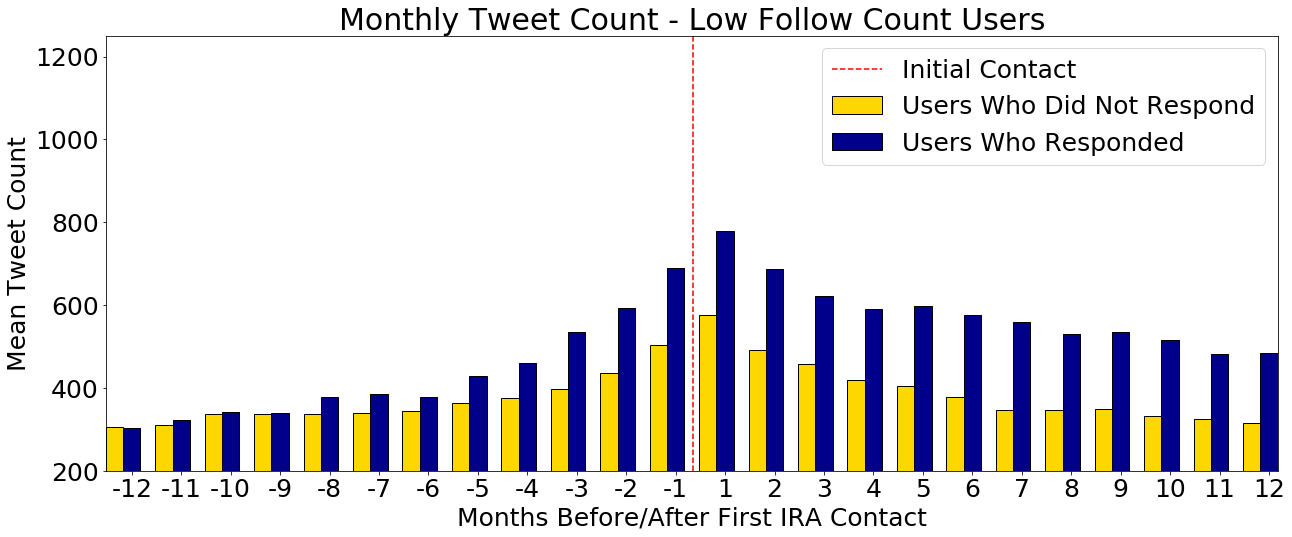

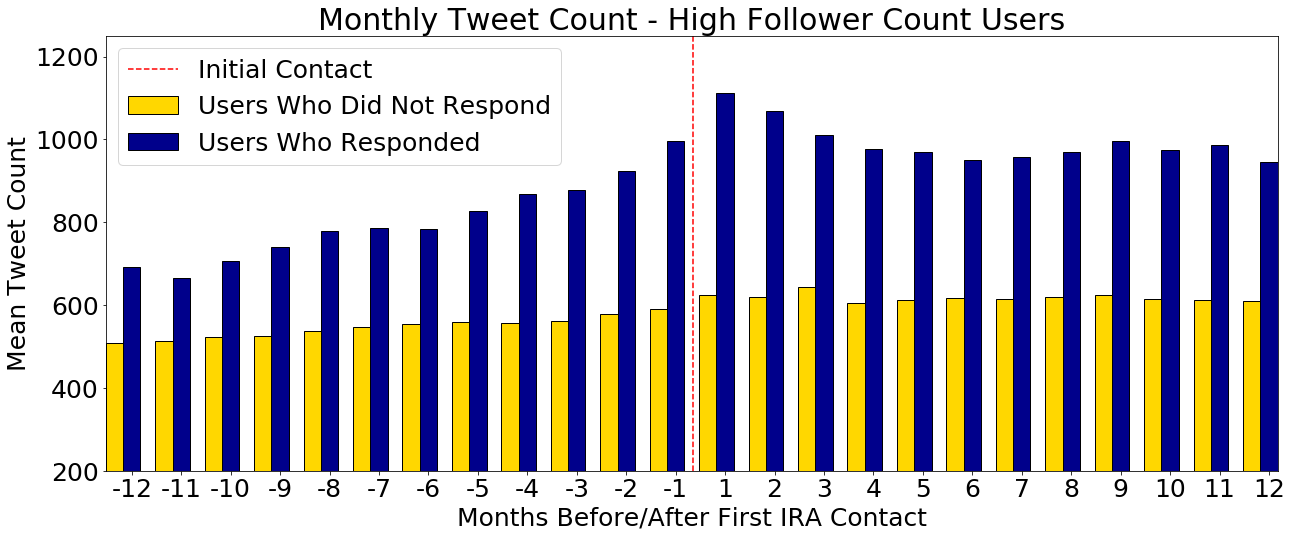

In [29]:
# LOW FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            NN_year1DF_count['-12'][0], NN_year1DF_count['-11'][0], NN_year1DF_count['-10'][0],
            NN_year1DF_count['-9'][0], NN_year1DF_count['-8'][0], NN_year1DF_count['-7'][0],
            NN_year1DF_count['-6'][0], NN_year1DF_count['-5'][0], NN_year1DF_count['-4'][0],
            NN_year1DF_count['-3'][0], NN_year1DF_count['-2'][0], NN_year1DF_count['-1'][0],
            NN_year1DF_count['1'][0], NN_year1DF_count['2'][0], NN_year1DF_count['3'][0],
            NN_year1DF_count['4'][0], NN_year1DF_count['5'][0], NN_year1DF_count['6'][0],
            NN_year1DF_count['7'][0], NN_year1DF_count['8'][0], NN_year1DF_count['9'][0],
            NN_year1DF_count['10'][0], NN_year1DF_count['11'][0], NN_year1DF_count['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            NR_year1DF_count['-12'][0], NR_year1DF_count['-11'][0], NR_year1DF_count['-10'][0],
            NR_year1DF_count['-9'][0], NR_year1DF_count['-8'][0], NR_year1DF_count['-7'][0],
            NR_year1DF_count['-6'][0], NR_year1DF_count['-5'][0], NR_year1DF_count['-4'][0],
            NR_year1DF_count['-3'][0], NR_year1DF_count['-2'][0], NR_year1DF_count['-1'][0],
            NR_year1DF_count['1'][0], NR_year1DF_count['2'][0], NR_year1DF_count['3'][0],
            NR_year1DF_count['4'][0], NR_year1DF_count['5'][0], NR_year1DF_count['6'][0],
            NR_year1DF_count['7'][0], NR_year1DF_count['8'][0], NR_year1DF_count['9'][0],
            NR_year1DF_count['10'][0], NR_year1DF_count['11'][0], NR_year1DF_count['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')



plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly Tweet Count - Low Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))
# rects3 = ax.plot(zvals, color='grey', label=None, linewidth=3, linestyle='dashed')
ax.autoscale(tight=True)
plt.ylim(top=1250, bottom=200)
plt.savefig('noninf_tweetcount.png')

plt.show()


print("\n")

# HIGH FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            IN_year1DF_count['-12'][0], IN_year1DF_count['-11'][0], IN_year1DF_count['-10'][0],
            IN_year1DF_count['-9'][0], IN_year1DF_count['-8'][0], IN_year1DF_count['-7'][0],
            IN_year1DF_count['-6'][0], IN_year1DF_count['-5'][0], IN_year1DF_count['-4'][0],
            IN_year1DF_count['-3'][0], IN_year1DF_count['-2'][0], IN_year1DF_count['-1'][0],
            IN_year1DF_count['1'][0], IN_year1DF_count['2'][0], IN_year1DF_count['3'][0],
            IN_year1DF_count['4'][0], IN_year1DF_count['5'][0], IN_year1DF_count['6'][0],
            IN_year1DF_count['7'][0], IN_year1DF_count['8'][0], IN_year1DF_count['9'][0],
            IN_year1DF_count['10'][0], IN_year1DF_count['11'][0], IN_year1DF_count['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            IR_year1DF_count['-12'][0], IR_year1DF_count['-11'][0], IR_year1DF_count['-10'][0],
            IR_year1DF_count['-9'][0], IR_year1DF_count['-8'][0], IR_year1DF_count['-7'][0],
            IR_year1DF_count['-6'][0], IR_year1DF_count['-5'][0], IR_year1DF_count['-4'][0],
            IR_year1DF_count['-3'][0], IR_year1DF_count['-2'][0], IR_year1DF_count['-1'][0],
            IR_year1DF_count['1'][0], IR_year1DF_count['2'][0], IR_year1DF_count['3'][0],
            IR_year1DF_count['4'][0], IR_year1DF_count['5'][0], IR_year1DF_count['6'][0],
            IR_year1DF_count['7'][0], IR_year1DF_count['8'][0], IR_year1DF_count['9'][0],
            IR_year1DF_count['10'][0], IR_year1DF_count['11'][0], IR_year1DF_count['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly Tweet Count - High Follower Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

# rects3 = ax.plot(zvals, color='grey', label=None, linewidth=3, linestyle='dashed')
ax.autoscale(tight=True)
plt.ylim(top=1250, bottom=200)
plt.savefig('inf_tweetcount.png')
plt.show()



In [30]:
IN_year1DF_sent.head()

,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10,11,12
0,0.100019,0.098135,0.0992302,0.0989854,0.0964184,0.0966922,0.0939024,0.0938962,0.0942695,0.0926955,0.0866539,0.0906426,0.0896531,0.0923095,0.0905072,0.0898303,0.0880979,0.0859761,0.0899822,0.089397,0.0913316,0.0867593,0.0873415,0.086084


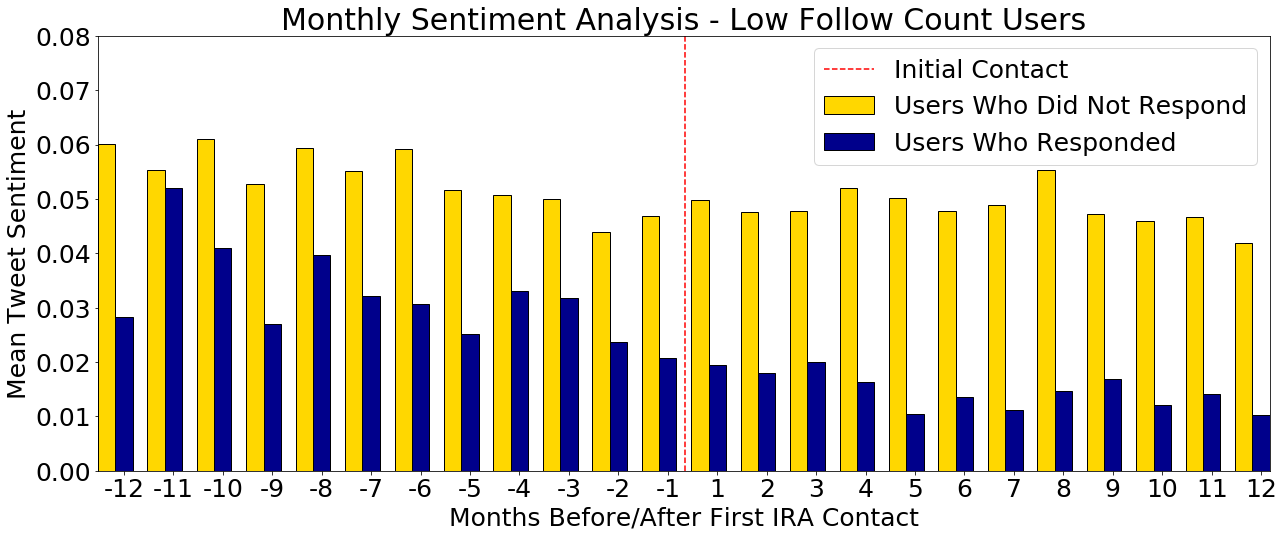

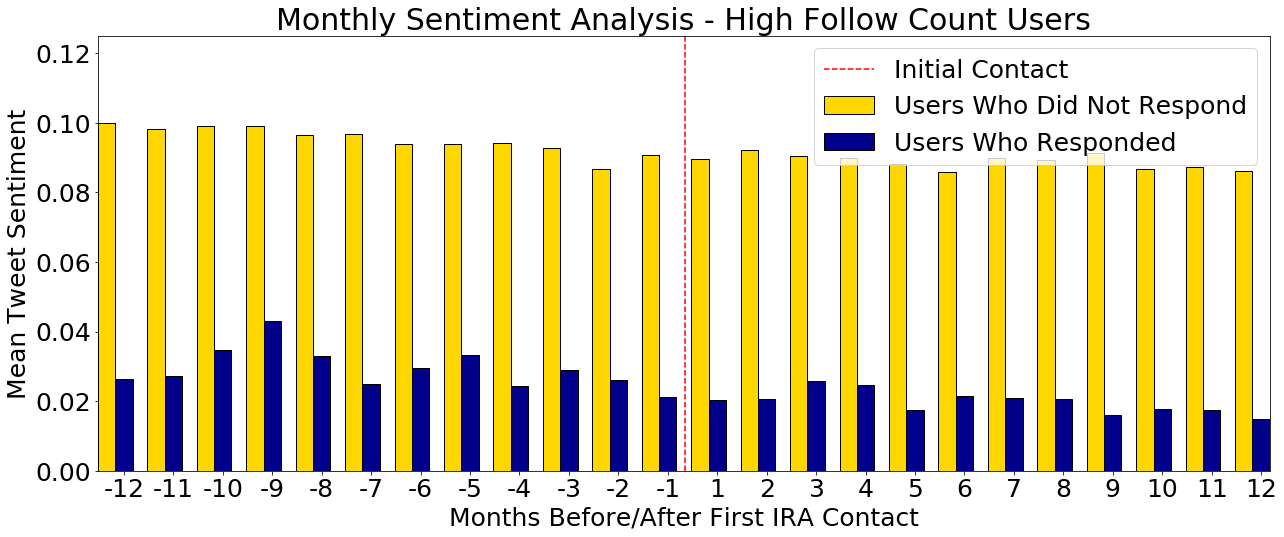

In [45]:
# LOW FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            NN_year1DF_sent['-12'][0], NN_year1DF_sent['-11'][0], NN_year1DF_sent['-10'][0],
            NN_year1DF_sent['-9'][0], NN_year1DF_sent['-8'][0], NN_year1DF_sent['-7'][0],
            NN_year1DF_sent['-6'][0], NN_year1DF_sent['-5'][0], NN_year1DF_sent['-4'][0],
            NN_year1DF_sent['-3'][0], NN_year1DF_sent['-2'][0], NN_year1DF_sent['-1'][0],
            NN_year1DF_sent['1'][0], NN_year1DF_sent['2'][0], NN_year1DF_sent['3'][0],
            NN_year1DF_sent['4'][0], NN_year1DF_sent['5'][0], NN_year1DF_sent['6'][0],
            NN_year1DF_sent['7'][0], NN_year1DF_sent['8'][0], NN_year1DF_sent['9'][0],
            NN_year1DF_sent['10'][0], NN_year1DF_sent['11'][0], NN_year1DF_sent['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            NR_year1DF_sent['-12'][0], NR_year1DF_sent['-11'][0], NR_year1DF_sent['-10'][0],
            NR_year1DF_sent['-9'][0], NR_year1DF_sent['-8'][0], NR_year1DF_sent['-7'][0],
            NR_year1DF_sent['-6'][0], NR_year1DF_sent['-5'][0], NR_year1DF_sent['-4'][0],
            NR_year1DF_sent['-3'][0], NR_year1DF_sent['-2'][0], NR_year1DF_sent['-1'][0],
            NR_year1DF_sent['1'][0], NR_year1DF_sent['2'][0], NR_year1DF_sent['3'][0],
            NR_year1DF_sent['4'][0], NR_year1DF_sent['5'][0], NR_year1DF_sent['6'][0],
            NR_year1DF_sent['7'][0], NR_year1DF_sent['8'][0], NR_year1DF_sent['9'][0],
            NR_year1DF_sent['10'][0], NR_year1DF_sent['11'][0], NR_year1DF_sent['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')



plt.ylabel('Mean Tweet Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly Sentiment Analysis - Low Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=.08)
plt.savefig('non_sent.png')

plt.show()


print("\n")

# HIGH FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            IN_year1DF_sent['-12'][0], IN_year1DF_sent['-11'][0], IN_year1DF_sent['-10'][0],
            IN_year1DF_sent['-9'][0], IN_year1DF_sent['-8'][0], IN_year1DF_sent['-7'][0],
            IN_year1DF_sent['-6'][0], IN_year1DF_sent['-5'][0], IN_year1DF_sent['-4'][0],
            IN_year1DF_sent['-3'][0], IN_year1DF_sent['-2'][0], IN_year1DF_sent['-1'][0],
            IN_year1DF_sent['1'][0], IN_year1DF_sent['2'][0], IN_year1DF_sent['3'][0],
            IN_year1DF_sent['4'][0], IN_year1DF_sent['5'][0], IN_year1DF_sent['6'][0],
            IN_year1DF_sent['7'][0], IN_year1DF_sent['8'][0], IN_year1DF_sent['9'][0],
            IN_year1DF_sent['10'][0], IN_year1DF_sent['11'][0], IN_year1DF_sent['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            IR_year1DF_sent['-12'][0], IR_year1DF_sent['-11'][0], IR_year1DF_sent['-10'][0],
            IR_year1DF_sent['-9'][0], IR_year1DF_sent['-8'][0], IR_year1DF_sent['-7'][0],
            IR_year1DF_sent['-6'][0], IR_year1DF_sent['-5'][0], IR_year1DF_sent['-4'][0],
            IR_year1DF_sent['-3'][0], IR_year1DF_sent['-2'][0], IR_year1DF_sent['-1'][0],
            IR_year1DF_sent['1'][0], IR_year1DF_sent['2'][0], IR_year1DF_sent['3'][0],
            IR_year1DF_sent['4'][0], IR_year1DF_sent['5'][0], IR_year1DF_sent['6'][0],
            IR_year1DF_sent['7'][0], IR_year1DF_sent['8'][0], IR_year1DF_sent['9'][0],
            IR_year1DF_sent['10'][0], IR_year1DF_sent['11'][0], IR_year1DF_sent['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Mean Tweet Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly Sentiment Analysis - High Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=.125)
plt.savefig('inf_sent.png')
plt.show()



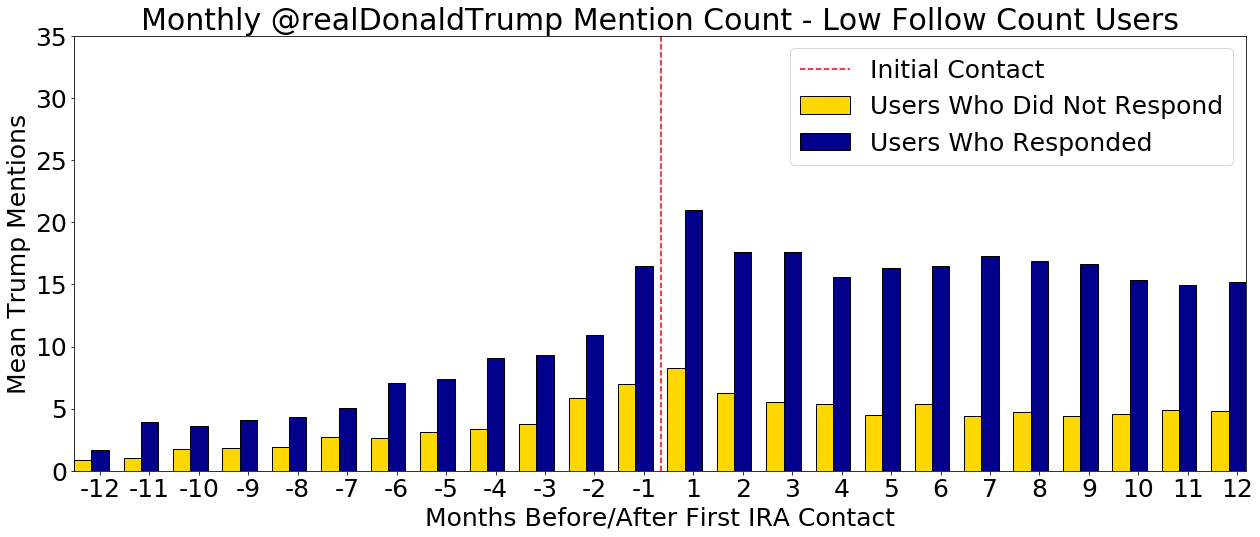

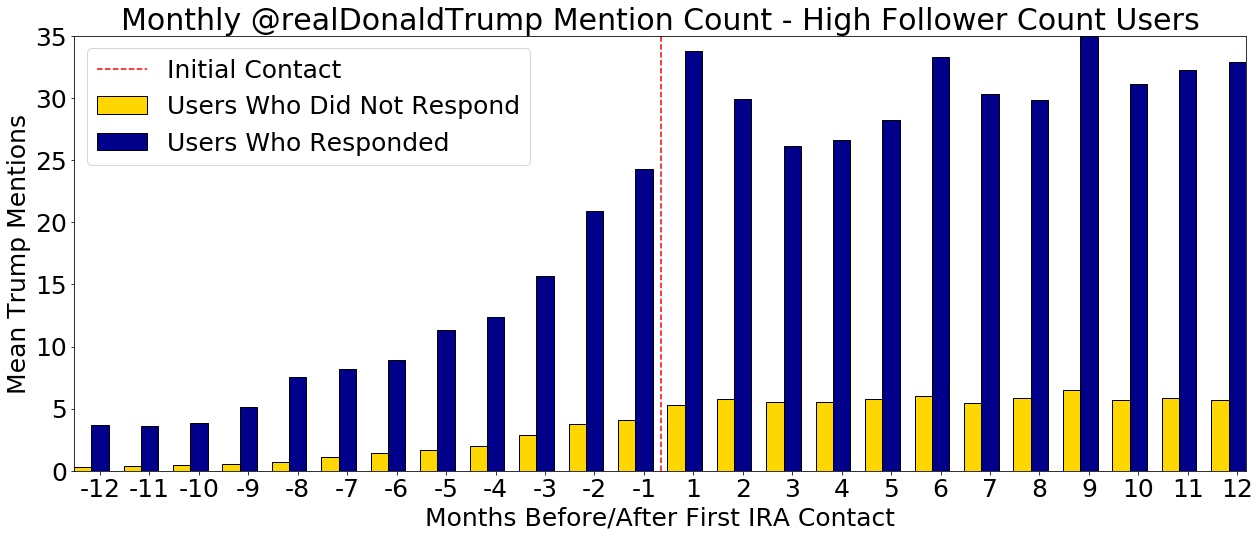

In [46]:
# LOW FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            NN_year1DF_trump['-12'][0], NN_year1DF_trump['-11'][0], NN_year1DF_trump['-10'][0],
            NN_year1DF_trump['-9'][0], NN_year1DF_trump['-8'][0], NN_year1DF_trump['-7'][0],
            NN_year1DF_trump['-6'][0], NN_year1DF_trump['-5'][0], NN_year1DF_trump['-4'][0],
            NN_year1DF_trump['-3'][0], NN_year1DF_trump['-2'][0], NN_year1DF_trump['-1'][0],
            NN_year1DF_trump['1'][0], NN_year1DF_trump['2'][0], NN_year1DF_trump['3'][0],
            NN_year1DF_trump['4'][0], NN_year1DF_trump['5'][0], NN_year1DF_trump['6'][0],
            NN_year1DF_trump['7'][0], NN_year1DF_trump['8'][0], NN_year1DF_trump['9'][0],
            NN_year1DF_trump['10'][0], NN_year1DF_trump['11'][0], NN_year1DF_trump['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            NR_year1DF_trump['-12'][0], NR_year1DF_trump['-11'][0], NR_year1DF_trump['-10'][0],
            NR_year1DF_trump['-9'][0], NR_year1DF_trump['-8'][0], NR_year1DF_trump['-7'][0],
            NR_year1DF_trump['-6'][0], NR_year1DF_trump['-5'][0], NR_year1DF_trump['-4'][0],
            NR_year1DF_trump['-3'][0], NR_year1DF_trump['-2'][0], NR_year1DF_trump['-1'][0],
            NR_year1DF_trump['1'][0], NR_year1DF_trump['2'][0], NR_year1DF_trump['3'][0],
            NR_year1DF_trump['4'][0], NR_year1DF_trump['5'][0], NR_year1DF_trump['6'][0],
            NR_year1DF_trump['7'][0], NR_year1DF_trump['8'][0], NR_year1DF_trump['9'][0],
            NR_year1DF_trump['10'][0], NR_year1DF_trump['11'][0], NR_year1DF_trump['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')


plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @realDonaldTrump Mention Count - Low Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=35)

plt.savefig('non_trump.png')
plt.show()


print("\n")

# HIGH FOLLOWER COUNT USER SET


N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            IN_year1DF_trump['-12'][0], IN_year1DF_trump['-11'][0], IN_year1DF_trump['-10'][0],
            IN_year1DF_trump['-9'][0], IN_year1DF_trump['-8'][0], IN_year1DF_trump['-7'][0],
            IN_year1DF_trump['-6'][0], IN_year1DF_trump['-5'][0], IN_year1DF_trump['-4'][0],
            IN_year1DF_trump['-3'][0], IN_year1DF_trump['-2'][0], IN_year1DF_trump['-1'][0],
            IN_year1DF_trump['1'][0], IN_year1DF_trump['2'][0], IN_year1DF_trump['3'][0],
            IN_year1DF_trump['4'][0], IN_year1DF_trump['5'][0], IN_year1DF_trump['6'][0],
            IN_year1DF_trump['7'][0], IN_year1DF_trump['8'][0], IN_year1DF_trump['9'][0],
            IN_year1DF_trump['10'][0], IN_year1DF_trump['11'][0], IN_year1DF_trump['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            IR_year1DF_trump['-12'][0], IR_year1DF_trump['-11'][0], IR_year1DF_trump['-10'][0],
            IR_year1DF_trump['-9'][0], IR_year1DF_trump['-8'][0], IR_year1DF_trump['-7'][0],
            IR_year1DF_trump['-6'][0], IR_year1DF_trump['-5'][0], IR_year1DF_trump['-4'][0],
            IR_year1DF_trump['-3'][0], IR_year1DF_trump['-2'][0], IR_year1DF_trump['-1'][0],
            IR_year1DF_trump['1'][0], IR_year1DF_trump['2'][0], IR_year1DF_trump['3'][0],
            IR_year1DF_trump['4'][0], IR_year1DF_trump['5'][0], IR_year1DF_trump['6'][0],
            IR_year1DF_trump['7'][0], IR_year1DF_trump['8'][0], IR_year1DF_trump['9'][0],
            IR_year1DF_trump['10'][0], IR_year1DF_trump['11'][0], IR_year1DF_trump['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @realDonaldTrump Mention Count - High Follower Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=35)
plt.savefig('inf_trump.png')

plt.show()



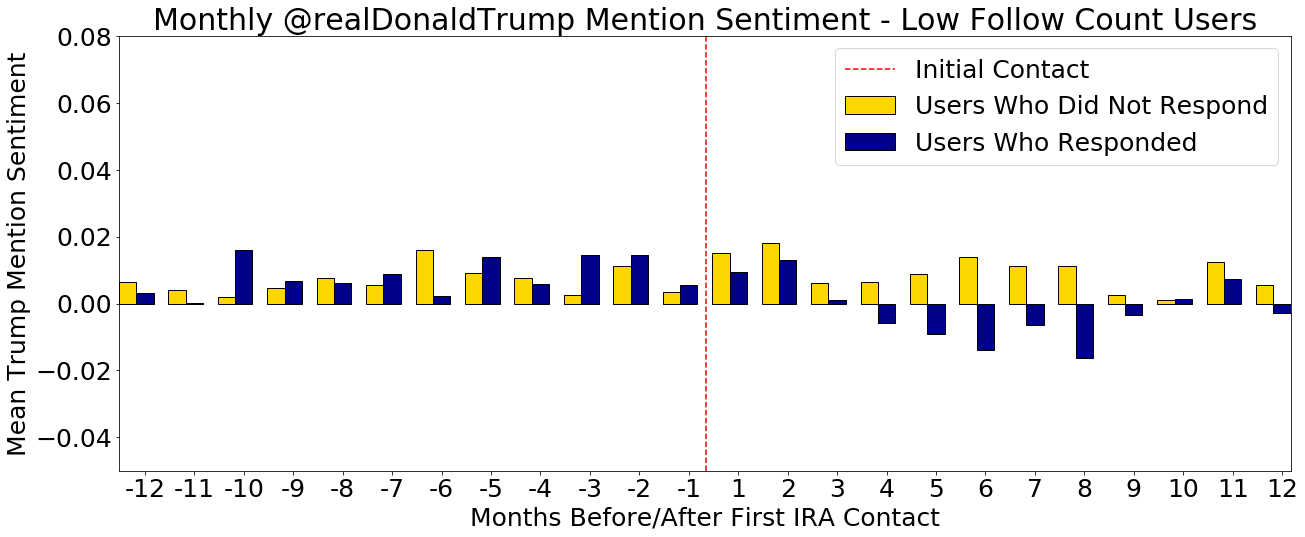

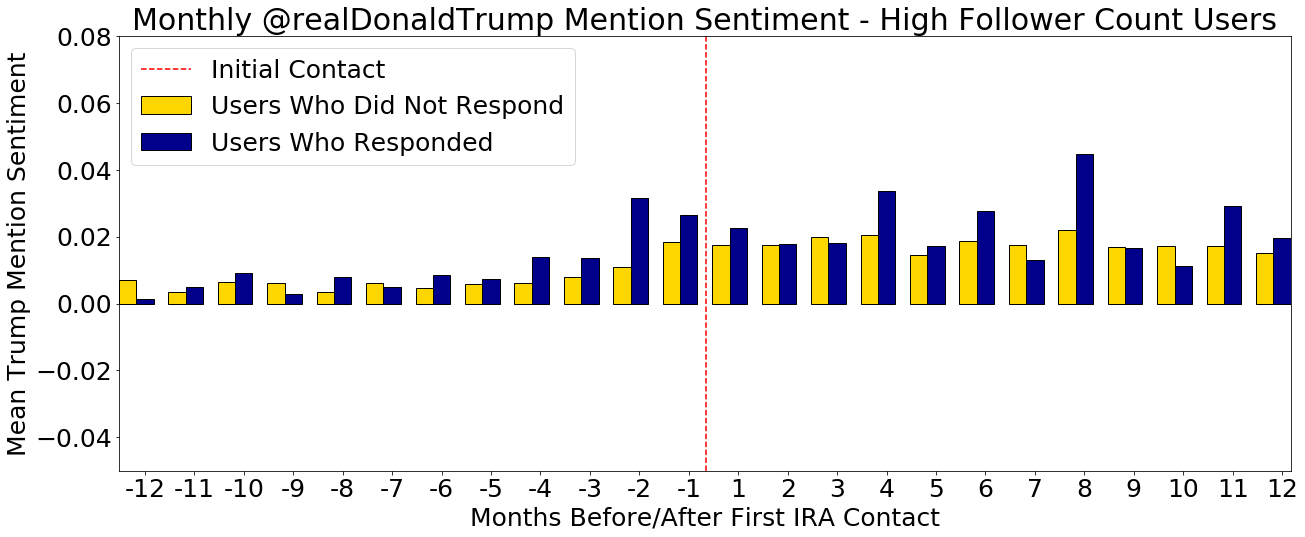

In [33]:
# LOW FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            NN_year1DF_trump_sent['-12'][0], NN_year1DF_trump_sent['-11'][0], NN_year1DF_trump_sent['-10'][0],
            NN_year1DF_trump_sent['-9'][0], NN_year1DF_trump_sent['-8'][0], NN_year1DF_trump_sent['-7'][0],
            NN_year1DF_trump_sent['-6'][0], NN_year1DF_trump_sent['-5'][0], NN_year1DF_trump_sent['-4'][0],
            NN_year1DF_trump_sent['-3'][0], NN_year1DF_trump_sent['-2'][0], NN_year1DF_trump_sent['-1'][0],
            NN_year1DF_trump_sent['1'][0], NN_year1DF_trump_sent['2'][0], NN_year1DF_trump_sent['3'][0],
            NN_year1DF_trump_sent['4'][0], NN_year1DF_trump_sent['5'][0], NN_year1DF_trump_sent['6'][0],
            NN_year1DF_trump_sent['7'][0], NN_year1DF_trump_sent['8'][0], NN_year1DF_trump_sent['9'][0],
            NN_year1DF_trump_sent['10'][0], NN_year1DF_trump_sent['11'][0], NN_year1DF_trump_sent['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            NR_year1DF_trump_sent['-12'][0], NR_year1DF_trump_sent['-11'][0], NR_year1DF_trump_sent['-10'][0],
            NR_year1DF_trump_sent['-9'][0], NR_year1DF_trump_sent['-8'][0], NR_year1DF_trump_sent['-7'][0],
            NR_year1DF_trump_sent['-6'][0], NR_year1DF_trump_sent['-5'][0], NR_year1DF_trump_sent['-4'][0],
            NR_year1DF_trump_sent['-3'][0], NR_year1DF_trump_sent['-2'][0], NR_year1DF_trump_sent['-1'][0],
            NR_year1DF_trump_sent['1'][0], NR_year1DF_trump_sent['2'][0], NR_year1DF_trump_sent['3'][0],
            NR_year1DF_trump_sent['4'][0], NR_year1DF_trump_sent['5'][0], NR_year1DF_trump_sent['6'][0],
            NR_year1DF_trump_sent['7'][0], NR_year1DF_trump_sent['8'][0], NR_year1DF_trump_sent['9'][0],
            NR_year1DF_trump_sent['10'][0], NR_year1DF_trump_sent['11'][0], NR_year1DF_trump_sent['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')


plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @realDonaldTrump Mention Sentiment - Low Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=.08, bottom=-.05)
plt.savefig('non_trump_sent.png')

plt.show()


print("\n")

# HIGH FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            IN_year1DF_trump_sent['-12'][0], IN_year1DF_trump_sent['-11'][0], IN_year1DF_trump_sent['-10'][0],
            IN_year1DF_trump_sent['-9'][0], IN_year1DF_trump_sent['-8'][0], IN_year1DF_trump_sent['-7'][0],
            IN_year1DF_trump_sent['-6'][0], IN_year1DF_trump_sent['-5'][0], IN_year1DF_trump_sent['-4'][0],
            IN_year1DF_trump_sent['-3'][0], IN_year1DF_trump_sent['-2'][0], IN_year1DF_trump_sent['-1'][0],
            IN_year1DF_trump_sent['1'][0], IN_year1DF_trump_sent['2'][0], IN_year1DF_trump_sent['3'][0],
            IN_year1DF_trump_sent['4'][0], IN_year1DF_trump_sent['5'][0], IN_year1DF_trump_sent['6'][0],
            IN_year1DF_trump_sent['7'][0], IN_year1DF_trump_sent['8'][0], IN_year1DF_trump_sent['9'][0],
            IN_year1DF_trump_sent['10'][0], IN_year1DF_trump_sent['11'][0], IN_year1DF_trump_sent['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            IR_year1DF_trump_sent['-12'][0], IR_year1DF_trump_sent['-11'][0], IR_year1DF_trump_sent['-10'][0],
            IR_year1DF_trump_sent['-9'][0], IR_year1DF_trump_sent['-8'][0], IR_year1DF_trump_sent['-7'][0],
            IR_year1DF_trump_sent['-6'][0], IR_year1DF_trump_sent['-5'][0], IR_year1DF_trump_sent['-4'][0],
            IR_year1DF_trump_sent['-3'][0], IR_year1DF_trump_sent['-2'][0], IR_year1DF_trump_sent['-1'][0],
            IR_year1DF_trump_sent['1'][0], IR_year1DF_trump_sent['2'][0], IR_year1DF_trump_sent['3'][0],
            IR_year1DF_trump_sent['4'][0], IR_year1DF_trump_sent['5'][0], IR_year1DF_trump_sent['6'][0],
            IR_year1DF_trump_sent['7'][0], IR_year1DF_trump_sent['8'][0], IR_year1DF_trump_sent['9'][0],
            IR_year1DF_trump_sent['10'][0], IR_year1DF_trump_sent['11'][0], IR_year1DF_trump_sent['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @realDonaldTrump Mention Sentiment - High Follower Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=.08, bottom=-.05)
plt.savefig('inf_trump_sent.png')

plt.show()



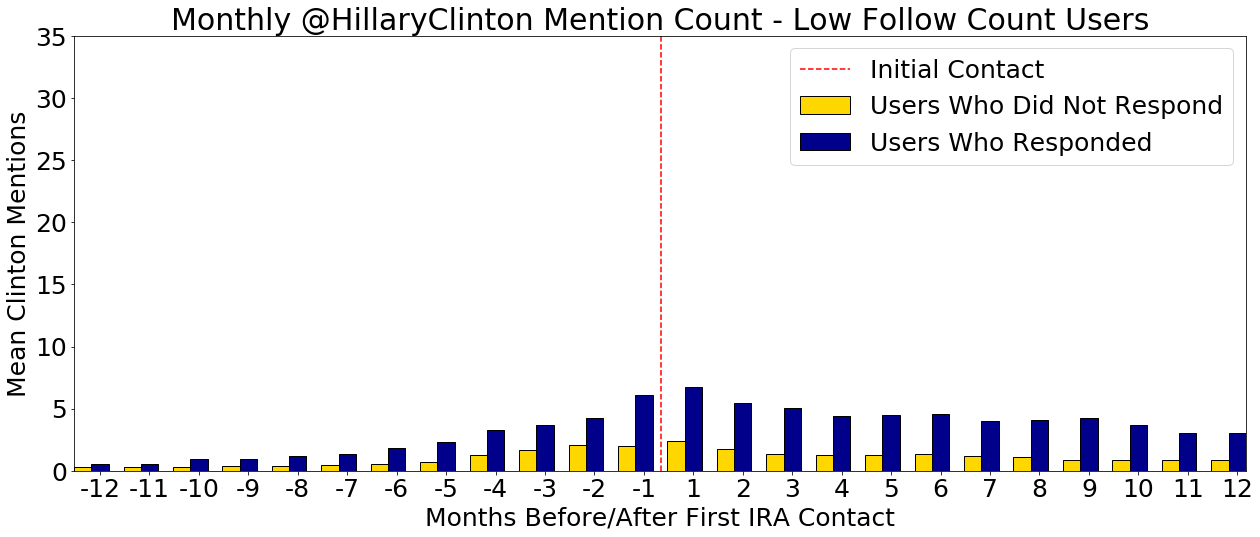

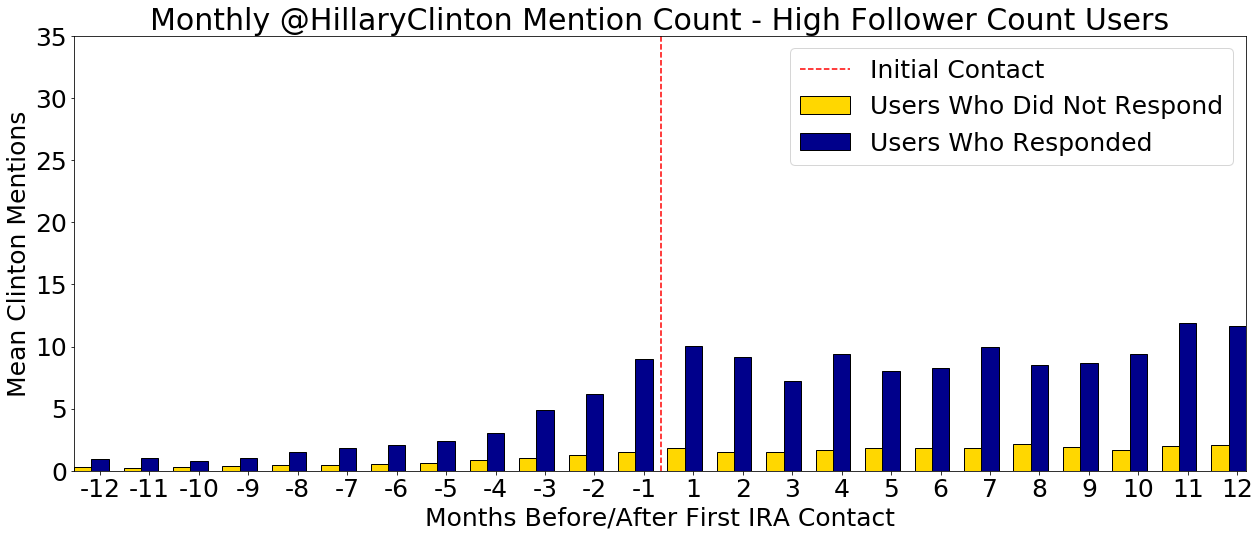

In [34]:
# LOW FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            NN_year1DF_clinton['-12'][0], NN_year1DF_clinton['-11'][0], NN_year1DF_clinton['-10'][0],
            NN_year1DF_clinton['-9'][0], NN_year1DF_clinton['-8'][0], NN_year1DF_clinton['-7'][0],
            NN_year1DF_clinton['-6'][0], NN_year1DF_clinton['-5'][0], NN_year1DF_clinton['-4'][0],
            NN_year1DF_clinton['-3'][0], NN_year1DF_clinton['-2'][0], NN_year1DF_clinton['-1'][0],
            NN_year1DF_clinton['1'][0], NN_year1DF_clinton['2'][0], NN_year1DF_clinton['3'][0],
            NN_year1DF_clinton['4'][0], NN_year1DF_clinton['5'][0], NN_year1DF_clinton['6'][0],
            NN_year1DF_clinton['7'][0], NN_year1DF_clinton['8'][0], NN_year1DF_clinton['9'][0],
            NN_year1DF_clinton['10'][0], NN_year1DF_clinton['11'][0], NN_year1DF_clinton['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            NR_year1DF_clinton['-12'][0], NR_year1DF_clinton['-11'][0], NR_year1DF_clinton['-10'][0],
            NR_year1DF_clinton['-9'][0], NR_year1DF_clinton['-8'][0], NR_year1DF_clinton['-7'][0],
            NR_year1DF_clinton['-6'][0], NR_year1DF_clinton['-5'][0], NR_year1DF_clinton['-4'][0],
            NR_year1DF_clinton['-3'][0], NR_year1DF_clinton['-2'][0], NR_year1DF_clinton['-1'][0],
            NR_year1DF_clinton['1'][0], NR_year1DF_clinton['2'][0], NR_year1DF_clinton['3'][0],
            NR_year1DF_clinton['4'][0], NR_year1DF_clinton['5'][0], NR_year1DF_clinton['6'][0],
            NR_year1DF_clinton['7'][0], NR_year1DF_clinton['8'][0], NR_year1DF_clinton['9'][0],
            NR_year1DF_clinton['10'][0], NR_year1DF_clinton['11'][0], NR_year1DF_clinton['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')



# HIGH FOLLOWER COUNT USER SET

plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @HillaryClinton Mention Count - Low Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=35)
plt.savefig('non_hillary.png')

plt.show()


print("\n")



N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            IN_year1DF_clinton['-12'][0], IN_year1DF_clinton['-11'][0], IN_year1DF_clinton['-10'][0],
            IN_year1DF_clinton['-9'][0], IN_year1DF_clinton['-8'][0], IN_year1DF_clinton['-7'][0],
            IN_year1DF_clinton['-6'][0], IN_year1DF_clinton['-5'][0], IN_year1DF_clinton['-4'][0],
            IN_year1DF_clinton['-3'][0], IN_year1DF_clinton['-2'][0], IN_year1DF_clinton['-1'][0],
            IN_year1DF_clinton['1'][0], IN_year1DF_clinton['2'][0], IN_year1DF_clinton['3'][0],
            IN_year1DF_clinton['4'][0], IN_year1DF_clinton['5'][0], IN_year1DF_clinton['6'][0],
            IN_year1DF_clinton['7'][0], IN_year1DF_clinton['8'][0], IN_year1DF_clinton['9'][0],
            IN_year1DF_clinton['10'][0], IN_year1DF_clinton['11'][0], IN_year1DF_clinton['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            IR_year1DF_clinton['-12'][0], IR_year1DF_clinton['-11'][0], IR_year1DF_clinton['-10'][0],
            IR_year1DF_clinton['-9'][0], IR_year1DF_clinton['-8'][0], IR_year1DF_clinton['-7'][0],
            IR_year1DF_clinton['-6'][0], IR_year1DF_clinton['-5'][0], IR_year1DF_clinton['-4'][0],
            IR_year1DF_clinton['-3'][0], IR_year1DF_clinton['-2'][0], IR_year1DF_clinton['-1'][0],
            IR_year1DF_clinton['1'][0], IR_year1DF_clinton['2'][0], IR_year1DF_clinton['3'][0],
            IR_year1DF_clinton['4'][0], IR_year1DF_clinton['5'][0], IR_year1DF_clinton['6'][0],
            IR_year1DF_clinton['7'][0], IR_year1DF_clinton['8'][0], IR_year1DF_clinton['9'][0],
            IR_year1DF_clinton['10'][0], IR_year1DF_clinton['11'][0], IR_year1DF_clinton['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @HillaryClinton Mention Count - High Follower Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=35)
plt.savefig('inf_hillary.png')

plt.show()



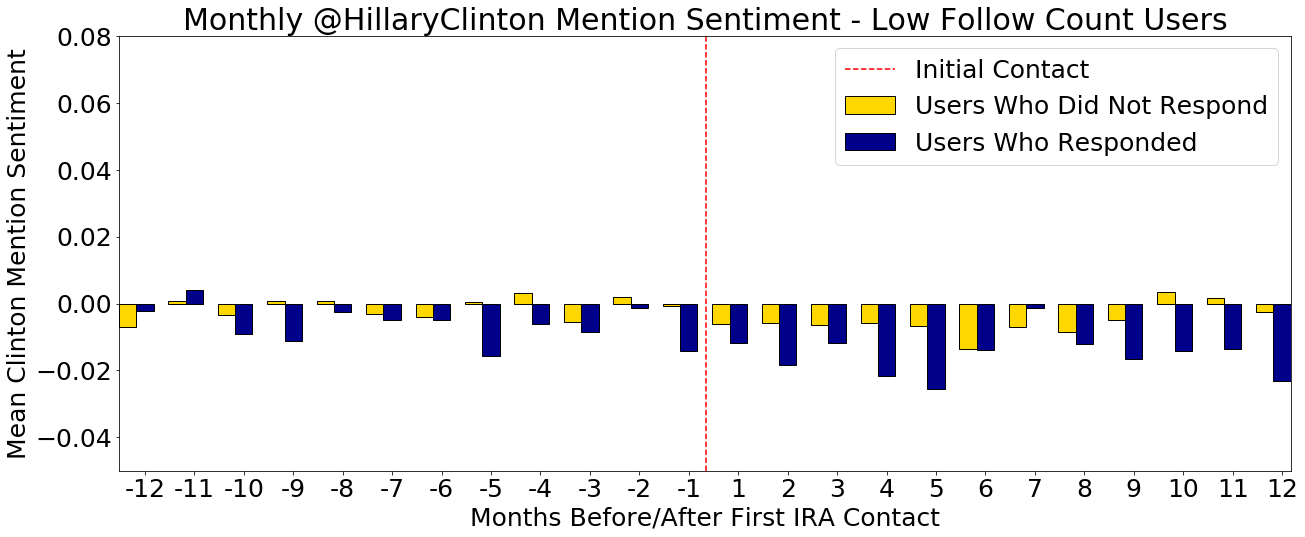

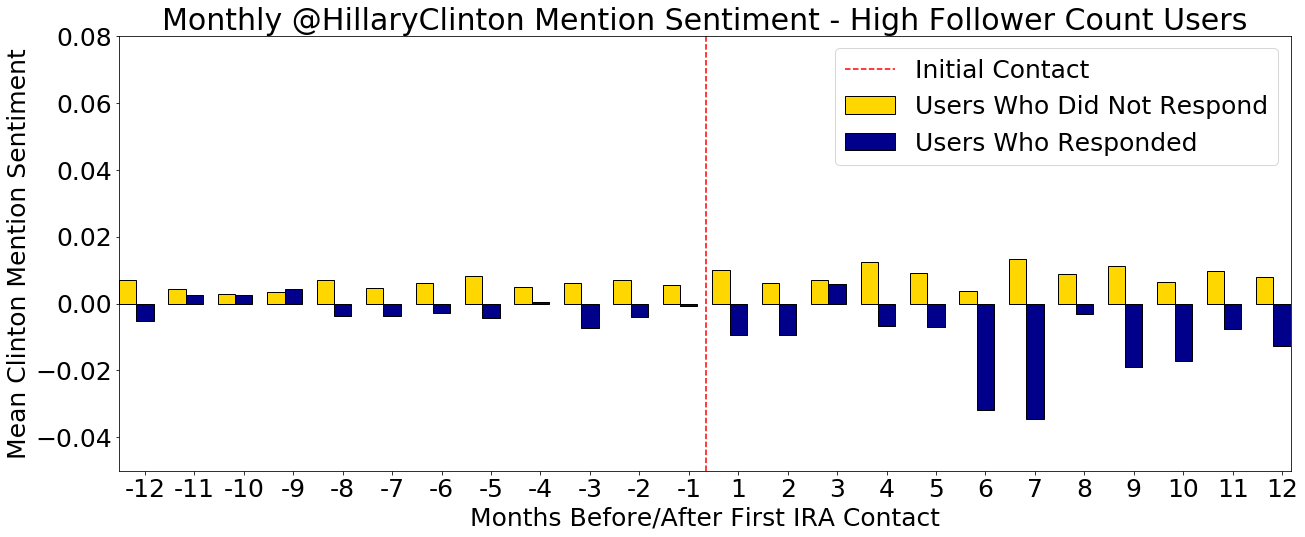

In [35]:
# LOW FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            NN_year1DF_clinton_sent['-12'][0], NN_year1DF_clinton_sent['-11'][0], NN_year1DF_clinton_sent['-10'][0],
            NN_year1DF_clinton_sent['-9'][0], NN_year1DF_clinton_sent['-8'][0], NN_year1DF_clinton_sent['-7'][0],
            NN_year1DF_clinton_sent['-6'][0], NN_year1DF_clinton_sent['-5'][0], NN_year1DF_clinton_sent['-4'][0],
            NN_year1DF_clinton_sent['-3'][0], NN_year1DF_clinton_sent['-2'][0], NN_year1DF_clinton_sent['-1'][0],
            NN_year1DF_clinton_sent['1'][0], NN_year1DF_clinton_sent['2'][0], NN_year1DF_clinton_sent['3'][0],
            NN_year1DF_clinton_sent['4'][0], NN_year1DF_clinton_sent['5'][0], NN_year1DF_clinton_sent['6'][0],
            NN_year1DF_clinton_sent['7'][0], NN_year1DF_clinton_sent['8'][0], NN_year1DF_clinton_sent['9'][0],
            NN_year1DF_clinton_sent['10'][0], NN_year1DF_clinton_sent['11'][0], NN_year1DF_clinton_sent['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            NR_year1DF_clinton_sent['-12'][0], NR_year1DF_clinton_sent['-11'][0], NR_year1DF_clinton_sent['-10'][0],
            NR_year1DF_clinton_sent['-9'][0], NR_year1DF_clinton_sent['-8'][0], NR_year1DF_clinton_sent['-7'][0],
            NR_year1DF_clinton_sent['-6'][0], NR_year1DF_clinton_sent['-5'][0], NR_year1DF_clinton_sent['-4'][0],
            NR_year1DF_clinton_sent['-3'][0], NR_year1DF_clinton_sent['-2'][0], NR_year1DF_clinton_sent['-1'][0],
            NR_year1DF_clinton_sent['1'][0], NR_year1DF_clinton_sent['2'][0], NR_year1DF_clinton_sent['3'][0],
            NR_year1DF_clinton_sent['4'][0], NR_year1DF_clinton_sent['5'][0], NR_year1DF_clinton_sent['6'][0],
            NR_year1DF_clinton_sent['7'][0], NR_year1DF_clinton_sent['8'][0], NR_year1DF_clinton_sent['9'][0],
            NR_year1DF_clinton_sent['10'][0], NR_year1DF_clinton_sent['11'][0], NR_year1DF_clinton_sent['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')


plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @HillaryClinton Mention Sentiment - Low Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=.08, bottom=-.05)
plt.savefig('non_hillary_sent.png')


plt.show()


print("\n")

# HIGH FOLLOWER COUNT USER SET

N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            IN_year1DF_clinton_sent['-12'][0], IN_year1DF_clinton_sent['-11'][0], IN_year1DF_clinton_sent['-10'][0],
            IN_year1DF_clinton_sent['-9'][0], IN_year1DF_clinton_sent['-8'][0], IN_year1DF_clinton_sent['-7'][0],
            IN_year1DF_clinton_sent['-6'][0], IN_year1DF_clinton_sent['-5'][0], IN_year1DF_clinton_sent['-4'][0],
            IN_year1DF_clinton_sent['-3'][0], IN_year1DF_clinton_sent['-2'][0], IN_year1DF_clinton_sent['-1'][0],
            IN_year1DF_clinton_sent['1'][0], IN_year1DF_clinton_sent['2'][0], IN_year1DF_clinton_sent['3'][0],
            IN_year1DF_clinton_sent['4'][0], IN_year1DF_clinton_sent['5'][0], IN_year1DF_clinton_sent['6'][0],
            IN_year1DF_clinton_sent['7'][0], IN_year1DF_clinton_sent['8'][0], IN_year1DF_clinton_sent['9'][0],
            IN_year1DF_clinton_sent['10'][0], IN_year1DF_clinton_sent['11'][0], IN_year1DF_clinton_sent['12'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            IR_year1DF_clinton_sent['-12'][0], IR_year1DF_clinton_sent['-11'][0], IR_year1DF_clinton_sent['-10'][0],
            IR_year1DF_clinton_sent['-9'][0], IR_year1DF_clinton_sent['-8'][0], IR_year1DF_clinton_sent['-7'][0],
            IR_year1DF_clinton_sent['-6'][0], IR_year1DF_clinton_sent['-5'][0], IR_year1DF_clinton_sent['-4'][0],
            IR_year1DF_clinton_sent['-3'][0], IR_year1DF_clinton_sent['-2'][0], IR_year1DF_clinton_sent['-1'][0],
            IR_year1DF_clinton_sent['1'][0], IR_year1DF_clinton_sent['2'][0], IR_year1DF_clinton_sent['3'][0],
            IR_year1DF_clinton_sent['4'][0], IR_year1DF_clinton_sent['5'][0], IR_year1DF_clinton_sent['6'][0],
            IR_year1DF_clinton_sent['7'][0], IR_year1DF_clinton_sent['8'][0], IR_year1DF_clinton_sent['9'][0],
            IR_year1DF_clinton_sent['10'][0], IR_year1DF_clinton_sent['11'][0], IR_year1DF_clinton_sent['12'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.title('Monthly @HillaryClinton Mention Sentiment - High Follower Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2',
       '-1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
plt.axvline(11.70, color="red", linestyle="--")
ax.legend(('Initial Contact','Users Who Did Not Respond', 'Users Who Responded'))

ax.autoscale(tight=True)
plt.ylim(top=.08, bottom=-.05)
plt.savefig('inf_hillary_sent.png')

plt.show()



In [36]:
noninfDF = pd.DataFrame(columns=['Tweet Count - Responsive', 'Tweet Count - Nonresponsive','Trump Mention Count - Responsive',
                                'Trump Mention Count - Nonresponsive', 'Hillary Mention Count - Responsive', 'Hillary Mention Count - Nonresponsive'])

noninfDF = noninfDF.append({'Tweet Count - Responsive': 27.22,
                            'Tweet Count - Nonresponsive': 17.27,
                            'Trump Mention Count - Responsive' : 68.45,
                            'Trump Mention Count - Nonresponsive': 26.95,
                            'Hillary Mention Count - Responsive': 42.34,
                            'Hillary Mention Count - Nonresponsive': 17.42 }, ignore_index = True)

infDF = pd.DataFrame(columns=['Tweet Count - Responsive', 'Tweet Count - Nonresponsive','Trump Mention Count - Responsive',
                                         'Trump Mention Count - Nonresponsive', 'Hillary Mention Count - Responsive', 'Hillary Mention Count - Nonresponsive'])

infDF = infDF.append({'Tweet Count - Responsive': 15.47,
                            'Tweet Count - Nonresponsive': 10.43,
                            'Trump Mention Count - Responsive' : 85.68,
                            'Trump Mention Count - Nonresponsive': 122.72,
                            'Hillary Mention Count - Responsive': 83.69,
                            'Hillary Mention Count - Nonresponsive': 70.74 }, ignore_index = True)

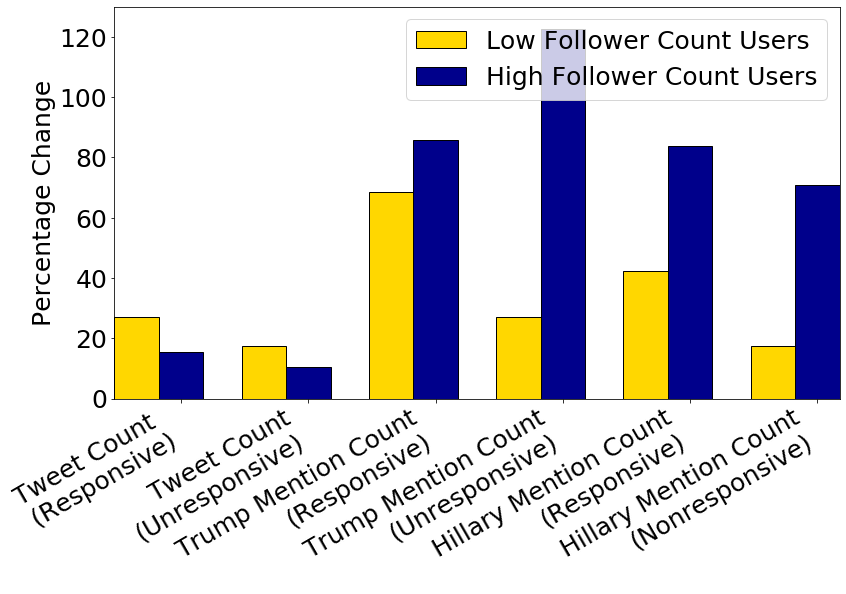

In [37]:
# LOW FOLLOWER COUNT USER SET

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)

yvals = [
            noninfDF['Tweet Count - Responsive'][0], noninfDF['Tweet Count - Nonresponsive'][0],
            noninfDF['Trump Mention Count - Responsive'][0], noninfDF['Trump Mention Count - Nonresponsive'][0], 
            noninfDF['Hillary Mention Count - Responsive'][0], noninfDF['Hillary Mention Count - Nonresponsive'][0] 
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            infDF['Tweet Count - Responsive'][0], infDF['Tweet Count - Nonresponsive'][0],
            infDF['Trump Mention Count - Responsive'][0], infDF['Trump Mention Count - Nonresponsive'][0], 
            infDF['Hillary Mention Count - Responsive'][0], infDF['Hillary Mention Count - Nonresponsive'][0] 
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Percentage Change')
# plt.xlabel('Months Before/After First IRA Contact')
# plt.title('Monthly @HillaryClinton Mention Sentiment - Low Follower Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Tweet Count \n (Responsive)', 'Tweet Count\n(Unresponsive)','Trump Mention Count\n(Responsive)',
                    'Trump Mention Count\n(Unresponsive)', 'Hillary Mention Count\n(Responsive)', 
                    'Hillary Mention Count\n(Nonresponsive)'))
# ax.autoscale(tight=True)
fig.autofmt_xdate()
ax.legend(( 'Low Follower Count Users', 'High Follower Count Users'))
# plt.axvline(11.70, color="red", linestyle="--")
ax.autoscale(tight=True)
plt.ylim(top=130)
# ax.tick_params(axis='both', which='major', pad=150)
plt.show()


In [38]:
NonNonDF = pd.DataFrame(columns=[
#     'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 'Hillary Mention Count'])
    'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 
    'Trump Mention Sentiment', 'Hillary Mention Count', 'Hillary Mention Sentiment'])

NonNonDF = NonNonDF.append({
    'Tweet Count' : 15.43,
    'Mean Monthly Sentiment': 2.24,
    'Trump Mention Count' : 27.93,
    'Trump Mention Sentiment': -39.18,
    'Hillary Mention Count' : 14.75,
    'Hillary Mention Sentiment' : -718.82
                           }, ignore_index = True)

NonResDF = pd.DataFrame(columns=[
#     'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 'Hillary Mention Count'])
    'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 
    'Trump Mention Sentiment', 'Hillary Mention Count', 'Hillary Mention Sentiment'])

NonResDF = NonResDF.append({
    'Tweet Count' : 26.02,
    'Mean Monthly Sentiment': -35.54,
    'Trump Mention Count' : 65.51,
    'Trump Mention Sentiment': -831.49,
    'Hillary Mention Count' : 55.43,
    'Hillary Mention Sentiment' : -24.98
                           }, ignore_index = True)

In [39]:
InfNonDF = pd.DataFrame(columns=[
#     'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 'Hillary Mention Count'])
    'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 
    'Trump Mention Sentiment', 'Hillary Mention Count', 'Hillary Mention Sentiment'])

InfNonDF = InfNonDF.append({
    'Tweet Count' : 9.83,
    'Mean Monthly Sentiment': -4.27,
    'Trump Mention Count' : 145.82,
    'Trump Mention Sentiment': 55.85,
    'Hillary Mention Count' : 67.4,
    'Hillary Mention Sentiment' : -7.19
                           }, ignore_index = True)

InfResDF = pd.DataFrame(columns=[
#     'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 'Hillary Mention Count'])
    'Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 
    'Trump Mention Sentiment', 'Hillary Mention Count', 'Hillary Mention Sentiment'])

InfResDF = InfResDF.append({
    'Tweet Count' : 15.96,
    'Mean Monthly Sentiment': -13.14,
    'Trump Mention Count' : 94.72,
    'Trump Mention Sentiment': -58.35,
    'Hillary Mention Count' : 101.62,
    'Hillary Mention Sentiment' : -642.12 
                           }, ignore_index = True)

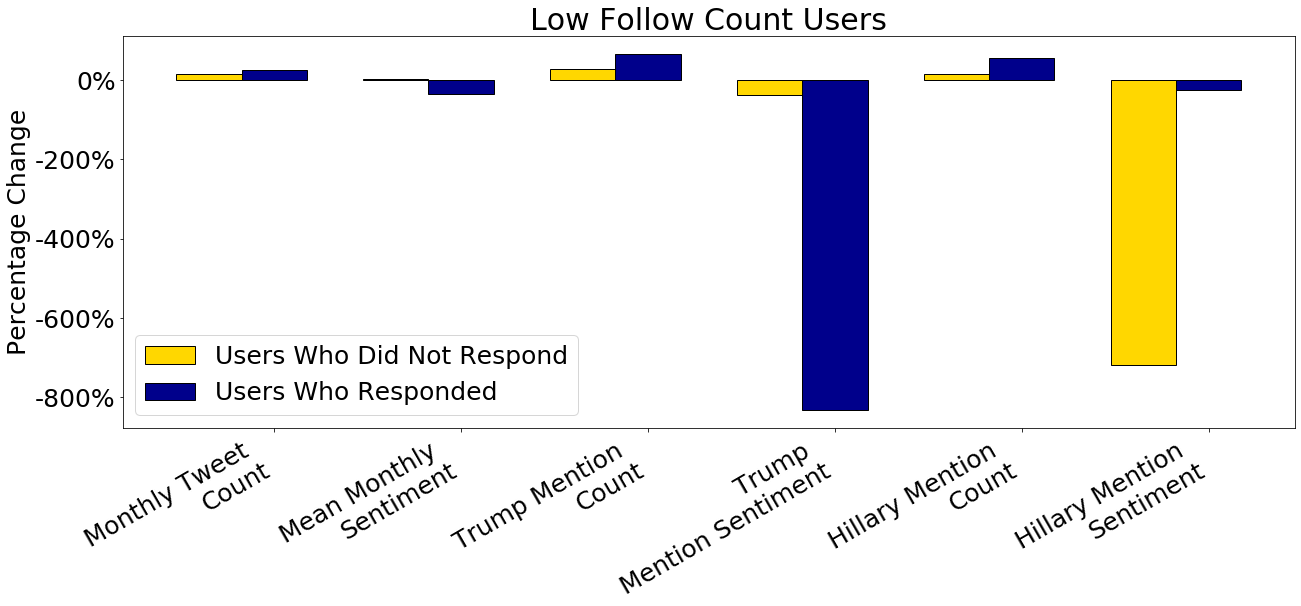

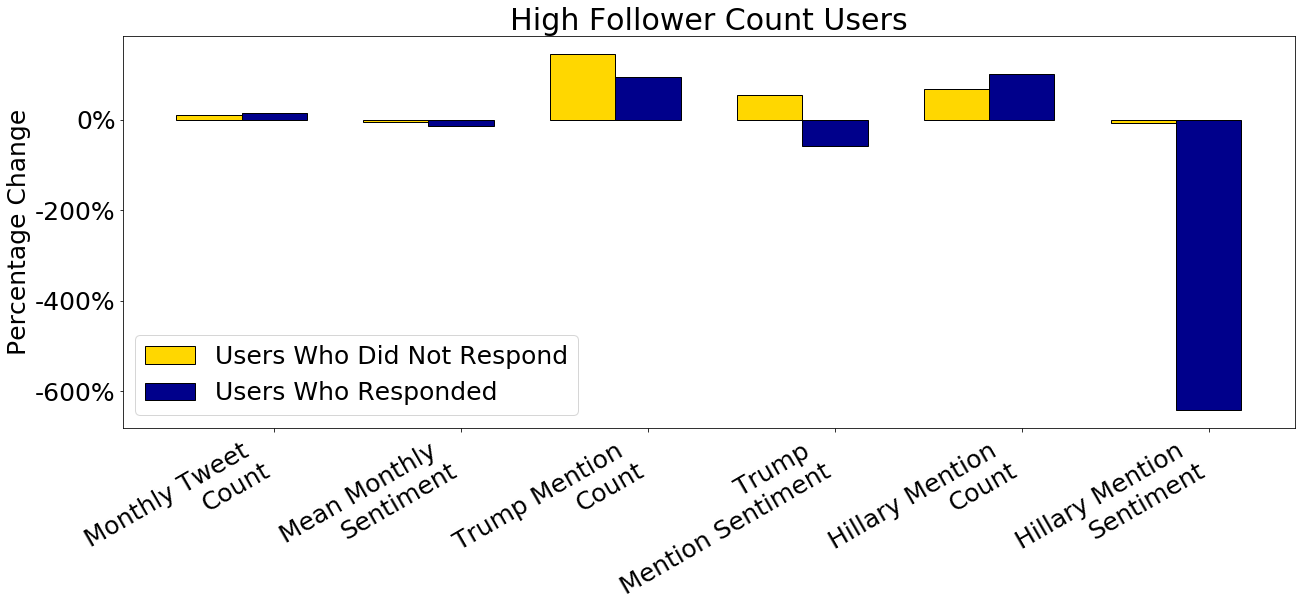

In [40]:
# LOW FOLLOWER COUNT USER SET

N = 6
ind = np.arange(N)  # the x locations for the groups
# width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            NonNonDF['Tweet Count'][0], NonNonDF['Mean Monthly Sentiment'][0], NonNonDF['Trump Mention Count'][0],
            NonNonDF['Trump Mention Sentiment'][0], NonNonDF['Hillary Mention Count'][0], NonNonDF['Hillary Mention Sentiment'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            NonResDF['Tweet Count'][0], NonResDF['Mean Monthly Sentiment'][0], NonResDF['Trump Mention Count'][0],
            NonResDF['Trump Mention Sentiment'][0], NonResDF['Hillary Mention Count'][0], NonResDF['Hillary Mention Sentiment'][0]
        ]

rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')


plt.ylabel('Percentage Change')
plt.title('Low Follow Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Monthly Tweet \nCount', 'Mean Monthly \nSentiment', 'Trump Mention \nCount', 
    'Trump \nMention Sentiment', 'Hillary Mention \nCount', 'Hillary Mention \nSentiment'))

ax.legend(('Users Who Did Not Respond', 'Users Who Responded'))

fig.autofmt_xdate()
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+'%' for y in y_vals])
# ax.autoscale(tight=True)
plt.show()
print("\n")

# HIGH FOLLOWER COUNT USER SET

N = 6
ind = np.arange(N)  # the x locations for the groups
# width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
            InfNonDF['Tweet Count'][0], InfNonDF['Mean Monthly Sentiment'][0], InfNonDF['Trump Mention Count'][0],
            InfNonDF['Trump Mention Sentiment'][0], InfNonDF['Hillary Mention Count'][0], InfNonDF['Hillary Mention Sentiment'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
            InfResDF['Tweet Count'][0], InfResDF['Mean Monthly Sentiment'][0], InfResDF['Trump Mention Count'][0],
            InfResDF['Trump Mention Sentiment'][0], InfResDF['Hillary Mention Count'][0], InfResDF['Hillary Mention Sentiment'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Percentage Change')
# plt.xlabel('Months Before/After First IRA Contact')
plt.title('High Follower Count Users')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Monthly Tweet \nCount', 'Mean Monthly \nSentiment', 'Trump Mention \nCount', 
    'Trump \nMention Sentiment', 'Hillary Mention \nCount', 'Hillary Mention \nSentiment'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
ax.legend(('Users Who Did Not Respond', 'Users Who Responded'))

fig.autofmt_xdate()
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+'%' for y in y_vals])
# ax.autoscale(tight=True)
# plt.ylim(top=.08, bottom=-.05)
plt.show()



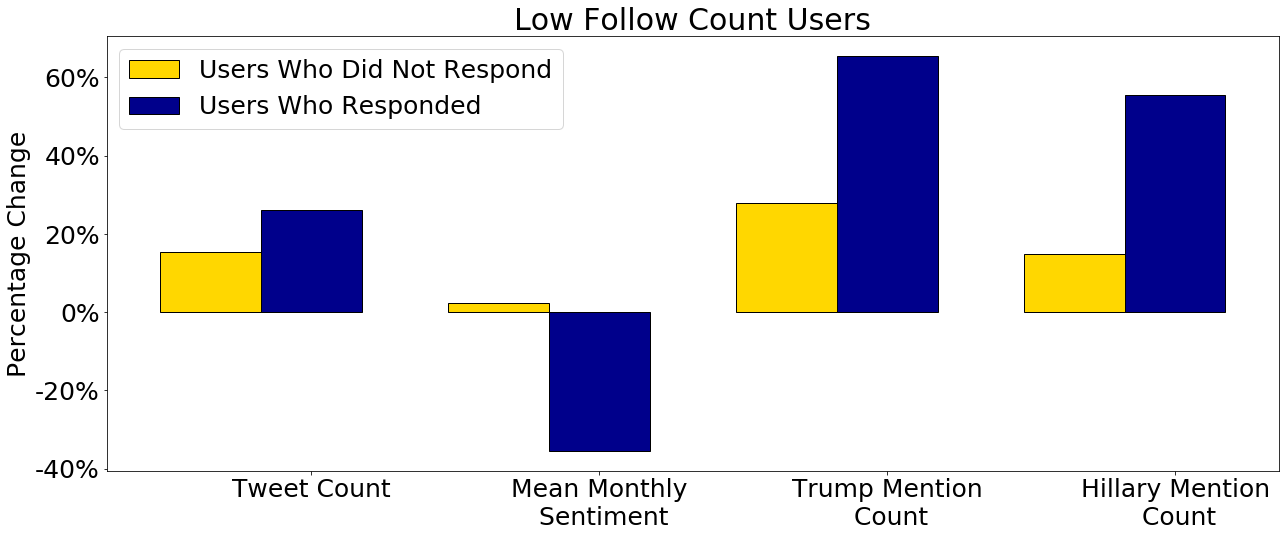

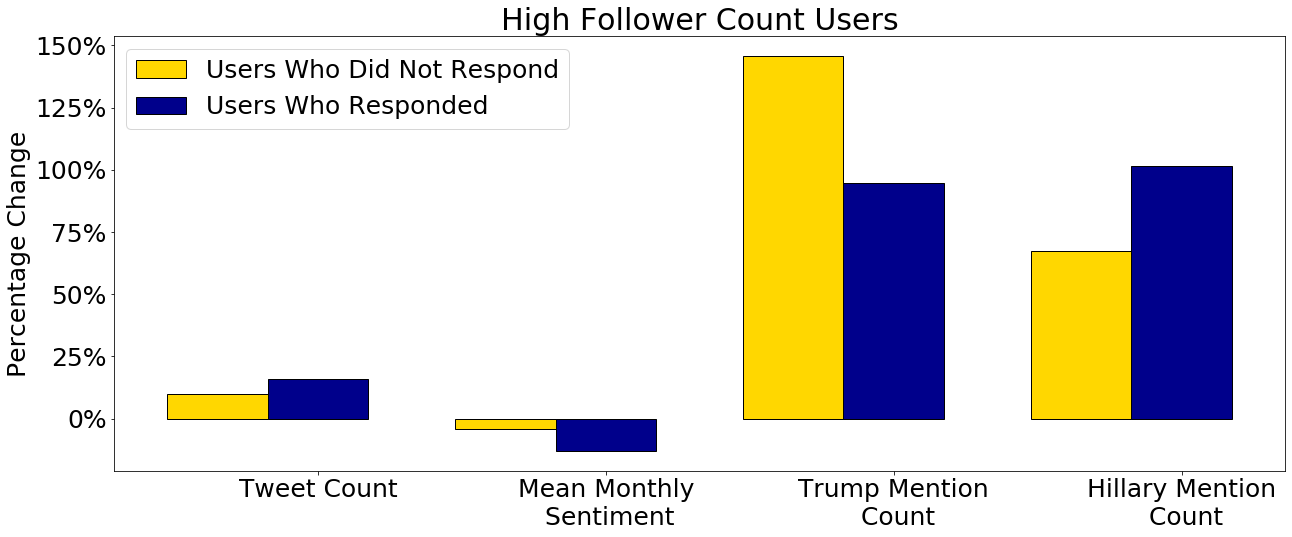

In [41]:
# LOW FOLLOWER COUNT USER SET

N = 4
# N = 6
ind = np.arange(N)  # the x locations for the groups
# width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
#             NonNonDF['Tweet Count'][0], NonNonDF['Mean Monthly Sentiment'][0], NonNonDF['Trump Mention Count'][0],
#             NonNonDF['Trump Mention Sentiment'][0], NonNonDF['Hillary Mention Count'][0], NonNonDF['Hillary Mention Sentiment'][0]
            NonNonDF['Tweet Count'][0], NonNonDF['Mean Monthly Sentiment'][0], NonNonDF['Trump Mention Count'][0],
            NonNonDF['Hillary Mention Count'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
#             NonResDF['Tweet Count'][0], NonResDF['Mean Monthly Sentiment'][0], NonResDF['Trump Mention Count'][0],
#             NonResDF['Trump Mention Sentiment'][0], NonResDF['Hillary Mention Count'][0], NonResDF['Hillary Mention Sentiment'][0]
            NonResDF['Tweet Count'][0], NonResDF['Mean Monthly Sentiment'][0], NonResDF['Trump Mention Count'][0],
            NonResDF['Hillary Mention Count'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')


plt.ylabel('Percentage Change')
# plt.xlabel('Months Before/After First IRA Contact')
plt.title('Low Follow Count Users')
ax.set_xticks(ind+width)
# ax.set_xticklabels(('Tweet Count', 'Mean Monthly Sentiment', 'Trump Mention Count', 
#     'Trump Mention Sentiment', 'Hillary Mention Count', 'Hillary Mention Sentiment'))
ax.set_xticklabels(('Tweet Count', 'Mean Monthly\n Sentiment', 'Trump Mention\n Count', 'Hillary Mention\n Count'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
ax.legend(('Users Who Did Not Respond', 'Users Who Responded'))

# fig.autofmt_xdate()
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+'%' for y in y_vals])
# plt.axvline(11.70, color="red", linestyle="--")
# ax.autoscale(tight=True)
# plt.ylim(top=.08, bottom=-.05)
plt.savefig('percent_change_noninf.png')
plt.show()


print("\n")

# HIGH FOLLOWER COUNT USER SET

# N = 6
N = 4
ind = np.arange(N)  # the x locations for the groups
# width = 0.35  # the width of the bars

fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)

yvals = [
#             InfNonDF['Tweet Count'][0], InfNonDF['Mean Monthly Sentiment'][0], InfNonDF['Trump Mention Count'][0],
#             InfNonDF['Trump Mention Sentiment'][0], InfNonDF['Hillary Mention Count'][0], InfNonDF['Hillary Mention Sentiment'][0]
            InfNonDF['Tweet Count'][0], InfNonDF['Mean Monthly Sentiment'][0], InfNonDF['Trump Mention Count'][0],
            InfNonDF['Hillary Mention Count'][0]
        ]

# rects1 = ax.bar(ind, yvals, width, color='green')
rects1 = ax.bar(ind, yvals, width, color='gold', edgecolor='black')

zvals = [
#             InfResDF['Tweet Count'][0], InfResDF['Mean Monthly Sentiment'][0], InfResDF['Trump Mention Count'][0],
#             InfResDF['Trump Mention Sentiment'][0], InfResDF['Hillary Mention Count'][0], InfResDF['Hillary Mention Sentiment'][0]
            InfResDF['Tweet Count'][0], InfResDF['Mean Monthly Sentiment'][0], InfResDF['Trump Mention Count'][0],
            InfResDF['Hillary Mention Count'][0]
        ]

# rects2 = ax.bar(ind+width, zvals, width, color='red')
rects2 = ax.bar(ind+width, zvals, width, color='darkblue', edgecolor='black')

plt.ylabel('Percentage Change')
# plt.xlabel('Months Before/After First IRA Contact')
plt.title('High Follower Count Users')
ax.set_xticks(ind+width)
# ax.set_xticklabels(('Tweet Count', 'Monthly Sentiment', 'Trump Count', 
#     'Trump Sentiment', 'Hillary Mention Count', 'Hillary Mention Sentiment'))
ax.set_xticklabels(('Tweet Count', 'Mean Monthly\n Sentiment', 'Trump Mention\n Count', 'Hillary Mention\n Count'))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('First Contact', 'Second Contact', 'Third Contact') )
ax.legend(('Users Who Did Not Respond', 'Users Who Responded'))

# fig.autofmt_xdate()
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+'%' for y in y_vals])
# ax.autoscale(tight=True)
# plt.ylim(top=.08, bottom=-.05)
plt.savefig('percent_change_inf.png')
plt.show()

